<h2><font color="#004D7F" size=6>Proyectos de Machine Learning</font></h2>



<h1><font color="#004D7F" size=5>Tipo: Proyecto de clasificación binaria</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Alonso Otiniano Zavala</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Importar librerías](#section11)
    * [2.1. Cargar el dataset](#section12)
* [2. Estadística descriptiva](#section2)
    * [2.1. Dimensiones del dataset](#section21)
    * [2.2. Visualización de datos](#section22)
    * [2.3. Resumen estadístico](#section23)
    * [2.4. Distribución de clase](#section24)
    * [2.5. Tipo de datos](#section25)
* [3. Visualización del dataset y Pretratamiento](#section3)
    * [3.1. Gráficos Univariado](#section31)
    * [3.2. Gráficos multivariados](#section32)
    * [3.3. Imputación NA, Eliminación Outliers y OHE](#section33)
* [4. Fase de modelado](#section4)
    * [4.1. Crear conjunto de validación](#section41)
    * [4.2. Evaluación de línea base](#section42)
    * [4.3. Evaluar modelos: estandarización, max min scaler y transformación](#section43)
* [5. Fase de Optimización](#section5)
    * [5.1. Optimización de k-NN](#section51)
    * [5.2. Optimización de SVM](#section52)
* [6. Agoritmos ensamblados](#section6)
* [7. Fase de forecasting](#section7)

In [1]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>


El proyecto tiene como base el conjunto de datos [Cylinder Bands](https://archive.ics.uci.edu/ml/datasets/Cylinder+Bands). El problema a predecir es si los cilindros son tipo band o no band, con lo cual tenemos un problema de clasificación binaria que consta de 39 atributos y 512 instancias en el área del análisis físico multivariable, además presenta valores perdidos; la data es categorica y real. No existe una descripción de las etiquetas especifica, solo se dan grandes rasgos.


Used in decision tree induction for mitigating process delays known as "cylinder bands" in rotogravure printing



<a id="section11"></a>
## <font color="#004D7F"> 1.1. Importar librerías</font>

En primer lugar cargaremos e importaremos todo lo necesario para el análisis que vamos a usar con este dataset (esto se obtiene del trabajo constante realizado).

In [2]:
# Classification Project: Cylinder band type 

# Load libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')

<a id="section12"></a>
## <font color="#004D7F"> 1.2. Cargar el dataset</font>

Para correr el dataset tuvimos que **corregir una fila** que se encontraba partida, lo cual genero muchos problemas al inicio del trabajo.

In [3]:
#Cargar dataset
filename = 'bands_delete.csv'
names = ['timestamp','customer','grain screened',
        'paper type','ink type','type of cylinder',
        'press type','press','unit number','cylinder size','paper mill location',
        'plating tank','proof cut','viscosity','caliper','ink temperature',
        'humifuty','roughness','blade pressure','varnish pct','press speed',
        'ink pct','solvent pct','ESA Voltage','ESA Amperage','wax','hardener',
        'roller durometer','current density','anode space ratio',
        'chrome content','band type']
data = pd.read_csv(filename, names = names, na_values = '?') 
data.tail() #Visualizamos ultimas filas del dataset
data.head() #Visualizamos primeras filass del dataset
data

timestamp  customer grain screened paper type  ink type type of cylinder  \
0     19910108   TVGUIDE            YES   UNCOATED  UNCOATED              YES   
1     19910109   TVGUIDE            YES   UNCOATED  UNCOATED              YES   
2     19910104    MODMAT            YES   UNCOATED    COATED              YES   
3     19910104    MASSEY            YES   UNCOATED  UNCOATED              YES   
4     19910111     KMART             NO   UNCOATED    COATED              YES   
..         ...       ...            ...        ...       ...              ...   
480   19910817  SHEPLERS            YES   UNCOATED  UNCOATED              YES   
481   19910724     USCAV            YES   UNCOATED  UNCOATED               NO   
482   19920208     KMART             NO   UNCOATED    COATED              YES   
483   19920207     KMART             NO   UNCOATED    COATED              YES   
484   19910730   TVGUIDE            YES   UNCOATED  UNCOATED              YES   

    press type  press  unit number cylinder size  ... solvent pct  \
0     Motter94    821            2       TABLOID  ...        36.4   
1     Motter94    821            2       TABLOID  ...        38.5   
2    WoodHoe70    815            9       CATALOG  ...        39.8   
3    WoodHoe70    816            9       CATALOG  ...        38.8   
4    WoodHoe70    816            2       TABLOID  ...        42.5   
..         ...    ...          ...           ...  ...         ...   
480   Albert70    802            7       SPIEGEL  ...        41.2   
481   Albert70    802            7       CATALOG  ...        38.5   
482   Motter94    821            7       TABLOID  ...        41.9   
483   Motter94    821            7       TABLOID  ...        41.9   
484   Motter94    821            2       TABLOID  ...        35.7   

     ESA Voltage  ESA Amperage  wax  hardener  roller durometer  \
0            0.0           0.0  2.5       1.0              34.0   
1            0.0           0.0  2.5       0.7              34.0   
2            0.0           0.0  2.8       0.9              40.0   
3            0.0           0.0  2.5       1.3              40.0   
4            5.0           0.0  2.3       0.6              35.0   
..           ...           ...  ...       ...               ...   
480          2.0           0.0  3.0       1.0              34.0   
481          3.0           0.0  3.0       1.0              32.0   
482          1.0           0.0  2.5       0.6              35.0   
483          1.0           0.0  2.5       0.3              35.0   
484          0.0           0.0  2.2       0.7              34.0   

     current density  anode space ratio  chrome content  band type  
0               40.0             105.00           100.0       band  
1               40.0             105.00           100.0     noband  
2               40.0             103.87           100.0     noband  
3               40.0             108.06           100.0     noband  
4               40.0             106.67           100.0     noband  
..               ...                ...             ...        ...  
480             40.0             100.00           100.0       band  
481             40.0             103.13           100.0       band  
482             40.0             100.00           100.0       band  
483             40.0             109.90           100.0       band  
484             40.0             100.00           100.0       band  

[485 rows x 32 columns]

Como podemos observar el data set *tiene valores NaN* en las ultimas filas y tiene una mezcla de variables tanto categoricas como continuas dentro del dataset. Se eliminaron de ellas 8 variables que poseen mismos valores (o más 95% de un solo valor) o son identificadores de la data; además las últimas filas tienen más del 50% de columnas nulas por lo cual también se eliminaron.

<a id="section2"></a>
# <font color="#004D7F"> 2. Estadística descriptiva</font>

En esta parte usaremos $ data.shape, data.head(), data.tail(), data.groupby("type band").size(), data.dtypes(), np.nan() $ para poder realizar un resumen estadístico inicial descrptivo.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Dimensiones del conjunto de datos</font>

`shape` para ver dimension:

In [5]:
data.shape

(485, 32)

Como vemos tenemos 485 instancias (filas) y 32 columnas.

In [4]:
data.columns #Con esto podemos ver el nombre de las columnas.

Index(['timestamp', 'customer', 'grain screened', 'paper type', 'ink type',
       'type of cylinder', 'press type', 'press', 'unit number',
       'cylinder size', 'paper mill location', 'plating tank', 'proof cut',
       'viscosity', 'caliper', 'ink temperature', 'humifuty', 'roughness',
       'blade pressure', 'varnish pct', 'press speed', 'ink pct',
       'solvent pct', 'ESA Voltage', 'ESA Amperage', 'wax', 'hardener',
       'roller durometer', 'current density', 'anode space ratio',
       'chrome content', 'band type'],
      dtype='object')

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Visualización de datos</font>

Visualizaremos la parte superior con la función `head()` y la parte inferior con `tail()`

In [7]:
pd.set_option('display.width', 100)
data.head(5)

timestamp customer grain screened paper type  ink type type of cylinder press type  press  \
0   19910108  TVGUIDE            YES   UNCOATED  UNCOATED              YES   Motter94    821   
1   19910109  TVGUIDE            YES   UNCOATED  UNCOATED              YES   Motter94    821   
2   19910104   MODMAT            YES   UNCOATED    COATED              YES  WoodHoe70    815   
3   19910104   MASSEY            YES   UNCOATED  UNCOATED              YES  WoodHoe70    816   
4   19910111    KMART             NO   UNCOATED    COATED              YES  WoodHoe70    816   

   unit number cylinder size  ... solvent pct  ESA Voltage  ESA Amperage  wax  hardener  \
0            2       TABLOID  ...        36.4          0.0           0.0  2.5       1.0   
1            2       TABLOID  ...        38.5          0.0           0.0  2.5       0.7   
2            9       CATALOG  ...        39.8          0.0           0.0  2.8       0.9   
3            9       CATALOG  ...        38.8          0.0           0.0  2.5       1.3   
4            2       TABLOID  ...        42.5          5.0           0.0  2.3       0.6   

   roller durometer  current density  anode space ratio  chrome content  band type  
0              34.0             40.0             105.00           100.0       band  
1              34.0             40.0             105.00           100.0     noband  
2              40.0             40.0             103.87           100.0     noband  
3              40.0             40.0             108.06           100.0     noband  
4              35.0             40.0             106.67           100.0     noband  

[5 rows x 32 columns]

In [8]:
data.tail(5)

timestamp  customer grain screened paper type  ink type type of cylinder press type  press  \
480   19910817  SHEPLERS            YES   UNCOATED  UNCOATED              YES   Albert70    802   
481   19910724     USCAV            YES   UNCOATED  UNCOATED               NO   Albert70    802   
482   19920208     KMART             NO   UNCOATED    COATED              YES   Motter94    821   
483   19920207     KMART             NO   UNCOATED    COATED              YES   Motter94    821   
484   19910730   TVGUIDE            YES   UNCOATED  UNCOATED              YES   Motter94    821   

     unit number cylinder size  ... solvent pct  ESA Voltage  ESA Amperage  wax  hardener  \
480            7       SPIEGEL  ...        41.2          2.0           0.0  3.0       1.0   
481            7       CATALOG  ...        38.5          3.0           0.0  3.0       1.0   
482            7       TABLOID  ...        41.9          1.0           0.0  2.5       0.6   
483            7       TABLOID  ...        41.9          1.0           0.0  2.5       0.3   
484            2       TABLOID  ...        35.7          0.0           0.0  2.2       0.7   

     roller durometer  current density  anode space ratio  chrome content  band type  
480              34.0             40.0             100.00           100.0       band  
481              32.0             40.0             103.13           100.0       band  
482              35.0             40.0             100.00           100.0       band  
483              35.0             40.0             109.90           100.0       band  
484              34.0             40.0             100.00           100.0       band  

[5 rows x 32 columns]

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Resumen estadístico</font>

Para poder revisar los estadísticos básicos como mínimos, máximos, mediana, media, cuartiles y conteo, usaremos la función `describe()`.

In [9]:
pd.set_option('precision', 3)
data.describe()

timestamp    press  unit number  plating tank  proof cut  viscosity  caliper  \
count  4.850e+02  485.000      485.000       468.000    468.000    484.000  465.000   
mean   1.991e+07  817.493        4.940      1910.353     45.069     50.888    0.276   
std    5.120e+03    7.602        3.267         0.478      9.089      8.081    0.071   
min    1.990e+07  802.000        1.000      1910.000     25.000     35.000    0.133   
25%    1.990e+07  815.000        2.000      1910.000     40.000     43.000    0.200   
50%    1.990e+07  816.000        2.000      1910.000     45.000     50.000    0.267   
75%    1.991e+07  824.000        9.000      1911.000     50.000     56.000    0.333   
max    1.992e+07  828.000       10.000      1911.000     72.500     72.000    0.533   

       ink temperature  humifuty  roughness  ...  ink pct  solvent pct  ESA Voltage  ESA Amperage  \
count          483.000   484.000    458.000  ...  484.000      484.000      483.000       485.000   
mean            15.313    78.475      0.729  ...   55.639       38.568        1.319         0.038   
std              1.269     7.946      0.192  ...    5.561        3.501        2.463         0.415   
min             11.200    57.000      0.056  ...   41.000       22.000        0.000         0.000   
25%             14.500    73.000      0.625  ...   52.100       36.800        0.000         0.000   
50%             15.100    78.000      0.750  ...   56.750       38.500        0.000         0.000   
75%             16.000    82.000      0.812  ...   58.800       41.200        2.000         0.000   
max             24.500   105.000      1.250  ...   76.900       53.400       16.000         6.000   

           wax  hardener  roller durometer  current density  anode space ratio  chrome content  
count  481.000   482.000           485.000          478.000            478.000         483.000  
mean     2.422     0.969            34.775           38.971            102.892          99.648  
std      0.528     0.342             4.506            2.426              4.891           1.845  
min      0.000     0.000            28.000           30.000             90.000          90.000  
25%      2.500     0.800            30.000           40.000            100.000         100.000  
50%      2.500     1.000            34.000           40.000            103.125         100.000  
75%      2.700     1.000            40.000           40.000            106.450         100.000  
max      3.100     3.000            60.000           45.000            117.860         100.000  

[8 rows x 23 columns]

Dentro de lo que podemos ver existe una variabilidad de escalas en todos los valores, los datos de **press y unit number** son categoricos así que no deben ser considerados de la visualización.

**count** los conteos de las variables no son iguales debido a que existen valores NA.

**proof cut** no presenta características anómalas detectadas en primera instancia, variable buena para el análisis,
**viscosity, caliper, ink temperature, humifuty, roughness, blade pressure** se podría decir lo mismo.

**varnish pct** Tiene valor máximo (35.800) muy por encima de la mediana(50%, 3.400) y la media(5.781), es posible que tenga ciertos valores muy altos o hasta outliers,pero eso lo reforzaremos viendo las gráficas univariantes.*Tener en cuenta revisar esta variable para el ML*.

**press speed** Aunque este valor tiene un mayor rango de variación (0,2600) presenta valores "bien distribuidos", lo obsevamos en los cuartiles 25%(1600), 50%(1800), 75%(2042), max(2600); es posible que existan mayor concentración de valores altos que  generen esta tendencia (generando algún tipo de asimetría) eso lo veremos con el coeficiente de asimetría y las gráficas univariadas.

**solvent pct** Se observa valores de mediana (38.50) y media (38.568) muy próximo con valor bajo de desviación estaándar (3.501), por lo cual esta variable en este aspecto es buena para el análisis.

**ESA Voltage** Esta variable tienen como tendencia valores bajos (mediana=0<media artimetica=1.319<<<<<maximo=16) esto asociada a un sd=2.463(superior que la media y mediana), nos hace pensar en valore "_outlayer_" esto considerando que el valor máximo es 16 (aproximadamente 15 veces la media aritmética); esto lo reforzamos con las gráfias univeriadas. *Tener en cuenta revisar esta variable para el ML*.

**ESA Amperage** Similar a ESA Voltage presentamos posibles valores _"outlayers"_ esto debido a que la media=0.038<<<<sd=0.415, asociado al que los cuartiles son cero y el máximo es 6 (158 veces más que la media).*Tener en cuenta revisar esta variable para el ML*.

**wax** Aunque posee una variabilidad considerable (sd =0.546 respecto mean=2.399) y los valores distribuidos hacia los más altos debido a que min=0, y los cuartiles 25%=2.4, 50%=2.5, 75%=2.6 y el máximo=3.1 hay que analizar con otros estadísticos y gráficos el motivo de estos valores en la varible.

**hardener** Podemos observar que los valores 25%=0.8, 50%=1.0, 75%=1 nos indican que la data tiene tendencia hacia el valor de 1, el valor de la sd=0.368 pueda ser que se incremento debido a que existen algunos valores altos (en el último 25%). Pero la distribución nos presenta gran concentración de datos, media~mediana. 

**roller durometer, current density, anode space ratio y chrome content** no presentan problemas o características anómalas en el análisis a primera instancia.

<a id="section24"></a>
## <font color="#004D7F"> 2.4. Distribución de clase</font>

Para poder ver la distribución de la clase en las filas (*instancias*) que pertenecen debemos tener en cuenta la medida absoluta y su porcentaje. Con ello tendremos una mejor idea del balance de la clase.

In [10]:
data.groupby('band type').size()

band type
band      173
noband    312
dtype: int64

Como podemos observar existe un desbalanceo de la clase porque tenemos 173 de tipo *band* y 312 de tipo *no band* lo cual nos da un porcentaje de 34.95% a 65.05%, existe desbalance de las clases. Es importante tener en cuenta esto al momento del modelado.

<a id="section25"></a>
## <font color="#004D7F"> 2.5. Tipo de datos</font>

Veremos ahora los tipos de datos, porque cada dato de entrada tiene una asignación predeterminada y al momento de cargar la data puede aparecer como otros tipos, usaremos la propiedad `dtypes`

In [61]:
data.dtypes

timestamp                int64
customer                object
grain screened          object
paper type              object
ink type                object
type of cylinder        object
press type              object
press                    int64
unit number              int64
cylinder size           object
paper mill location     object
plating tank           float64
proof cut              float64
viscosity              float64
caliper                float64
ink temperature        float64
humifuty               float64
roughness              float64
blade pressure         float64
varnish pct            float64
press speed            float64
ink pct                float64
solvent pct            float64
ESA Voltage            float64
ESA Amperage           float64
wax                    float64
hardener               float64
roller durometer       float64
current density        float64
anode space ratio      float64
chrome content         float64
band type               object
dtype: o

Como vemos tenemos diferentes tipos de data dentro de estas existe valores que estan como float pero son categorias, además que tenemos muchos que estan como objeto y son categoricos, esto lo cambiaremos posteriormente.

<a id="section311"></a>
### <font color="#004D7F"> Valores NaN</font>

Como sabemos nuestra data tiene valores NaN, sin embargo tenemos que tenerlos identificados por cada característica.


In [62]:
data.isnull().sum()

timestamp                0
customer                 0
grain screened          10
paper type               0
ink type                 0
type of cylinder         8
press type               0
press                    0
unit number              0
cylinder size            0
paper mill location    101
plating tank            17
proof cut               17
viscosity                1
caliper                 20
ink temperature          2
humifuty                 1
roughness               27
blade pressure          62
varnish pct              1
press speed             10
ink pct                  1
solvent pct              1
ESA Voltage              2
ESA Amperage             0
wax                      4
hardener                 3
roller durometer         0
current density          7
anode space ratio        7
chrome content           2
band type                0
dtype: int64

Como podemos apreciar los principales características son *paper mill location* con _101 NA_ , *blade pressure* con _62 NA_ aunque no superan el 20% de la cantidad de instancias; además tenemos *roughness* con _27 NA_ , y *caliper, proof cut, plating tank* con menos de _20 NA_ , en los otros casos son insignificantes.

**Se imputaran con valores de mediana, media o moda para estas características**

<a id="section3"></a>
# <font color="#004D7F"> 3. Visualización del conjunto de datos y Pretratamiento</font>

Ahora tenemos una idea inicial sobre los datos. Debemos pasar a la etapa de visualización para complementar esa idea inicial, obteniendo posibles distribuciones de las características así como posibles valores *outlayers*.
Vamos a ver dos tipos de gráficos de visualización de datos:
* Gráficos univariados para comprender mejor cada atributo.
* Gráficos multivariados para comprender mejor las relaciones entre los atributos.

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Gráficos Univariados</font>

Las gráficas univariadas nos permitirán poder analizar de manera individual las características para poder ver cual es el posible comportamiento de los atributos, con ello complementar lo realizado en el análisis descriptivo.

<a id="section311"></a>
### <font color="#004D7F"> Boxplots</font>

Usaremos para graficar las variables, no distingueremos el tipo.

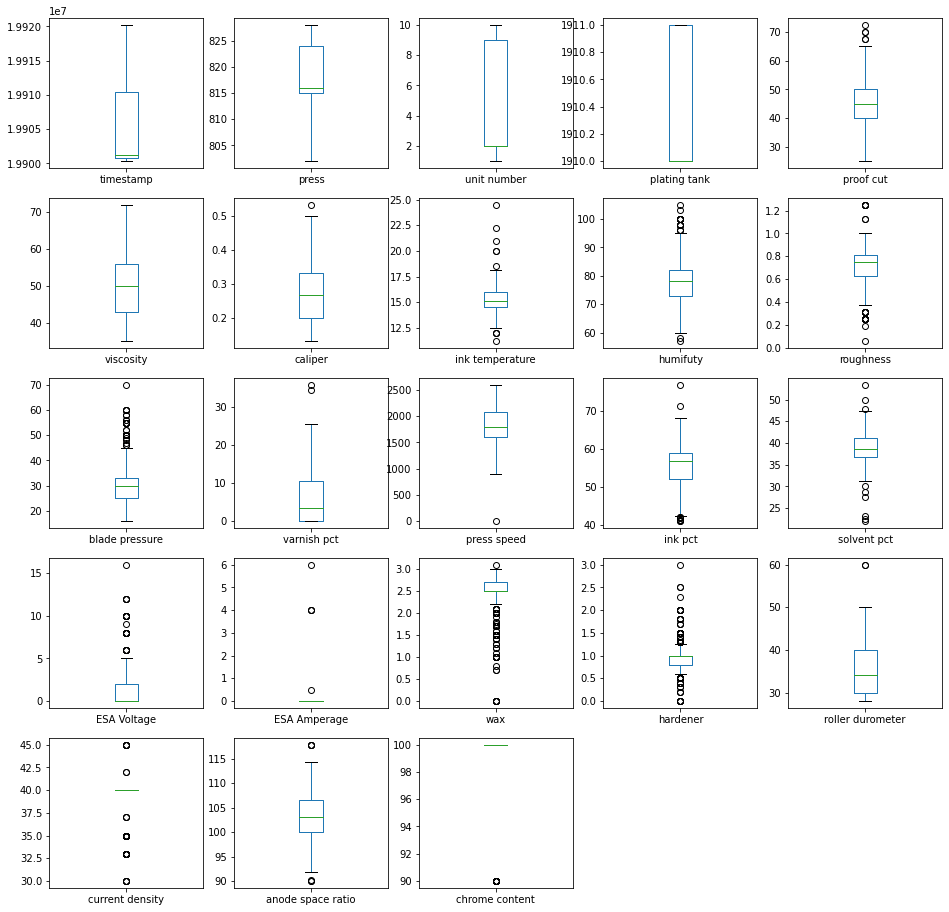

In [64]:
%matplotlib inline
fig = plt.figure(figsize=(16,16))
ax = fig.gca()
data.plot(ax = ax, kind = 'box',subplots = True, layout = (5,5),
         sharex = False)
plt.show()

<a id="section311"></a>
### <font color="#004D7F"> Histograma</font>

El histograma nos permite ver la forma de distribución de las características además de darnos una idea de el tipo de función con la cual se puede distribuir además del caracter multimodal que puede tener.

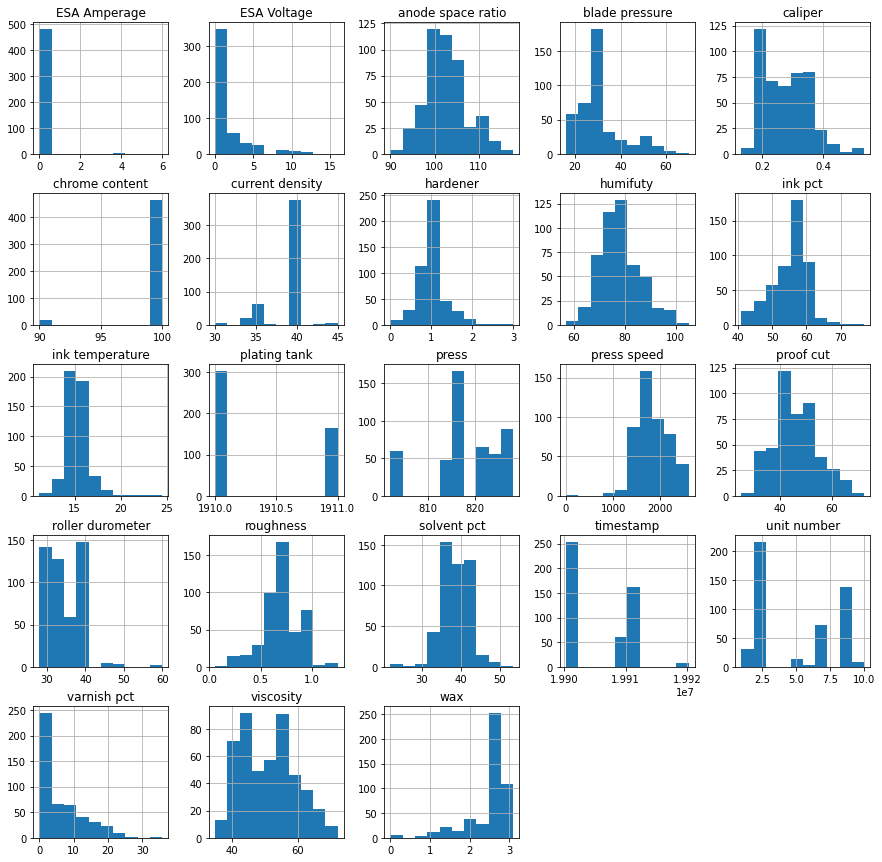

In [11]:
%matplotlib inline
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

In [12]:
data2 = data.drop(['timestamp','ESA Amperage', 'chrome content'], axis=1)
data2

customer grain screened paper type  ink type type of cylinder press type  press  unit number  \
0     TVGUIDE            YES   UNCOATED  UNCOATED              YES   Motter94    821            2   
1     TVGUIDE            YES   UNCOATED  UNCOATED              YES   Motter94    821            2   
2      MODMAT            YES   UNCOATED    COATED              YES  WoodHoe70    815            9   
3      MASSEY            YES   UNCOATED  UNCOATED              YES  WoodHoe70    816            9   
4       KMART             NO   UNCOATED    COATED              YES  WoodHoe70    816            2   
..        ...            ...        ...       ...              ...        ...    ...          ...   
480  SHEPLERS            YES   UNCOATED  UNCOATED              YES   Albert70    802            7   
481     USCAV            YES   UNCOATED  UNCOATED               NO   Albert70    802            7   
482     KMART             NO   UNCOATED    COATED              YES   Motter94    821            7   
483     KMART             NO   UNCOATED    COATED              YES   Motter94    821            7   
484   TVGUIDE            YES   UNCOATED  UNCOATED              YES   Motter94    821            2   

    cylinder size paper mill location  ...  press speed  ink pct  solvent pct  ESA Voltage  wax  \
0         TABLOID             NorthUS  ...       1700.0     50.5         36.4          0.0  2.5   
1         TABLOID             NorthUS  ...       1900.0     54.9         38.5          0.0  2.5   
2         CATALOG             NorthUS  ...       1850.0     53.8         39.8          0.0  2.8   
3         CATALOG             NorthUS  ...       1467.0     55.6         38.8          0.0  2.5   
4         TABLOID                 NaN  ...       2100.0     57.5         42.5          5.0  2.3   
..            ...                 ...  ...          ...      ...          ...          ...  ...   
480       SPIEGEL                 NaN  ...       1470.0     58.8         41.2          2.0  3.0   
481       CATALOG                 NaN  ...       1640.0     54.9         38.5          3.0  3.0   
482       TABLOID                 NaN  ...       2000.0     58.1         41.9          1.0  2.5   
483       TABLOID                 NaN  ...       2000.0     58.1         41.9          1.0  2.5   
484       TABLOID                 NaN  ...       1750.0     51.0         35.7          0.0  2.2   

     hardener  roller durometer  current density  anode space ratio  band type  
0         1.0              34.0             40.0             105.00       band  
1         0.7              34.0             40.0             105.00     noband  
2         0.9              40.0             40.0             103.87     noband  
3         1.3              40.0             40.0             108.06     noband  
4         0.6              35.0             40.0             106.67     noband  
..        ...               ...              ...                ...        ...  
480       1.0              34.0             40.0             100.00       band  
481       1.0              32.0             40.0             103.13       band  
482       0.6              35.0             40.0             100.00       band  
483       0.3              35.0             40.0             109.90       band  
484       0.7              34.0             40.0             100.00       band  

[485 rows x 29 columns]

Estas variables las sacamos porque son características ya analizadas mediante feature selection - importance y no aportaron a los modelos de prueba.

<a id="section311"></a>
### <font color="#004D7F"> Diagrama de densidad</font>

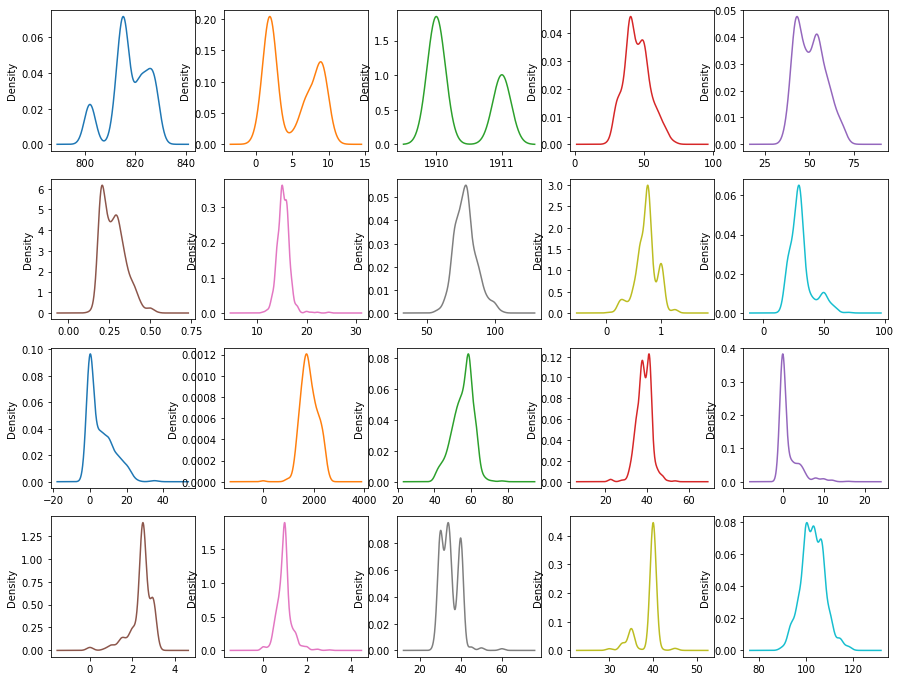

In [13]:
# density
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data2.plot(ax=ax, kind='density', subplots=True, layout=(5,5), sharex=False, legend=False)
plt.show()

In [14]:
data2.shape

(485, 29)

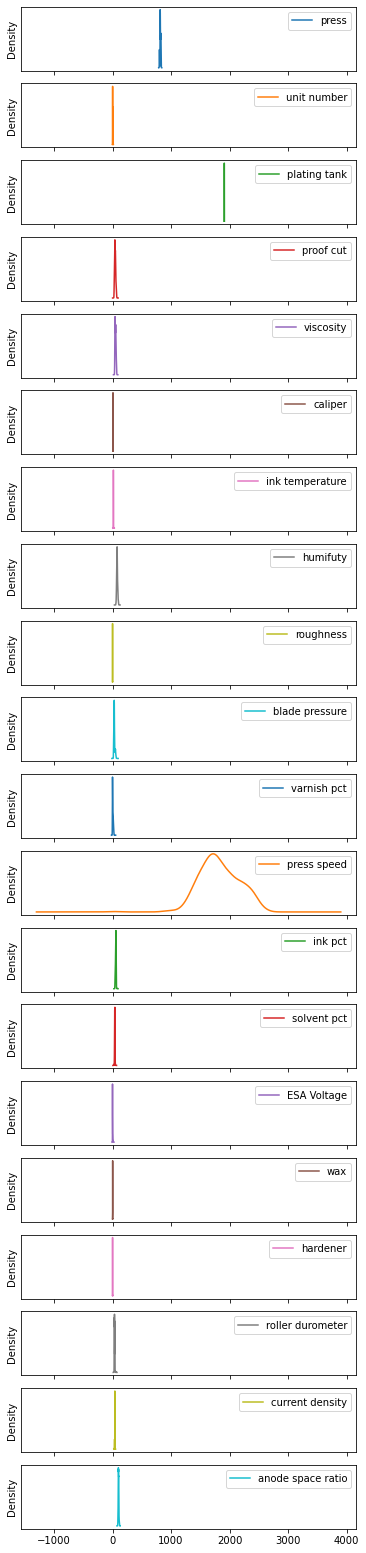

In [15]:
data2.plot.density(figsize=(6, 28), subplots=True, yticks=[])
pass

De los histogramas y curvas de densidad podemos resaltar lo siguiente:

Para las variables *cuantitativas*:

**ESA Voltage, wax y varnisch pct** posible distribución exponencial.

**anode space ratio, humifuty, ink temperature, proof cut, viscosity, caliper, roughness,
ink pct, press speed, solven pct, current density** posible distribución normal.

**hardener** Distribución normal dudosa.

**chrome content, roller durometer,ESA Amperage,timestamp, blade pressure** caracteristícas de dos o mas concentraciones en la data.

<a id="section32"></a>
## <font color="#004D7F"> 3.2. Gráficos multivariados</font>

Realizaremos el análisis entre variables.


<a id="section311"></a>
### <font color="#004D7F"> Gráfico de Correlación</font>

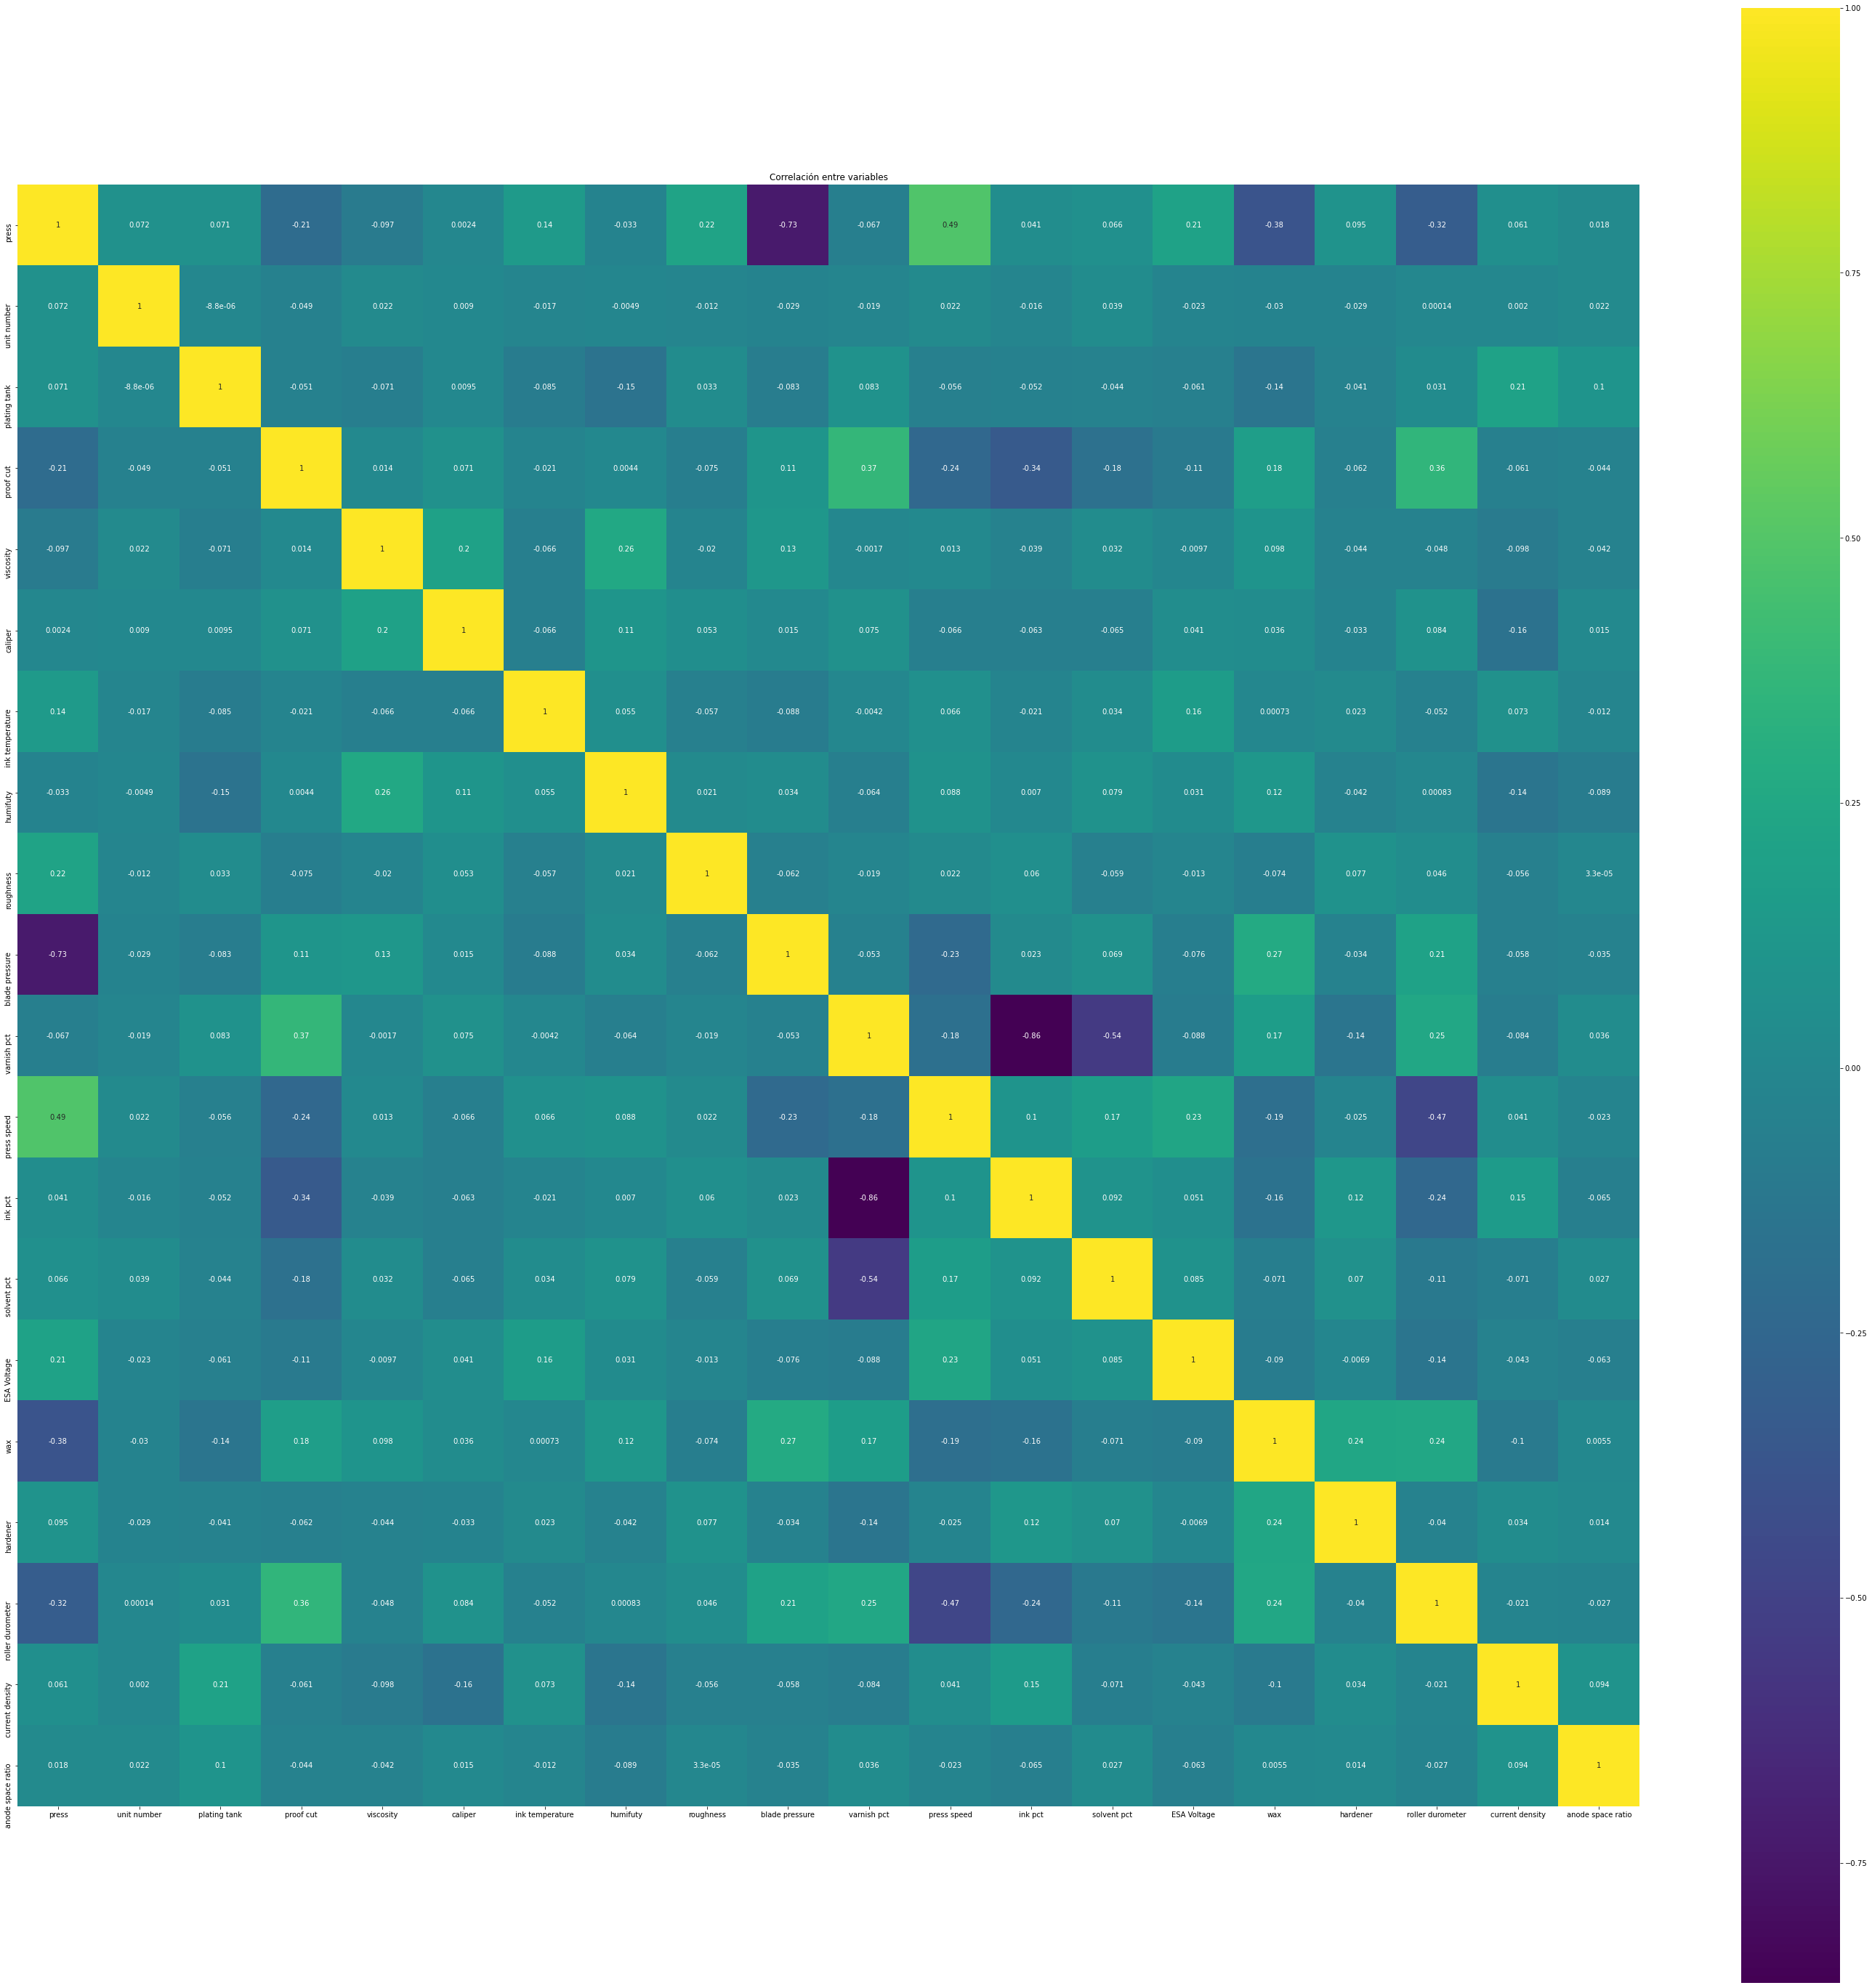

In [17]:
correlation = data2.corr()
plt.figure(figsize=(50,50))
ax = sns.heatmap(correlation, vmax=1, square=True, annot = True, cmap = 'viridis')
plt.title('Correlación entre variables')
plt.show()

Solo existe una alta correlación entre ink pct y varnish pct, las demás variables (no targets) no se relacionan entre sí.

<a id="section311"></a>
### <font color="#004D7F"> Matriz de Dispersión</font>

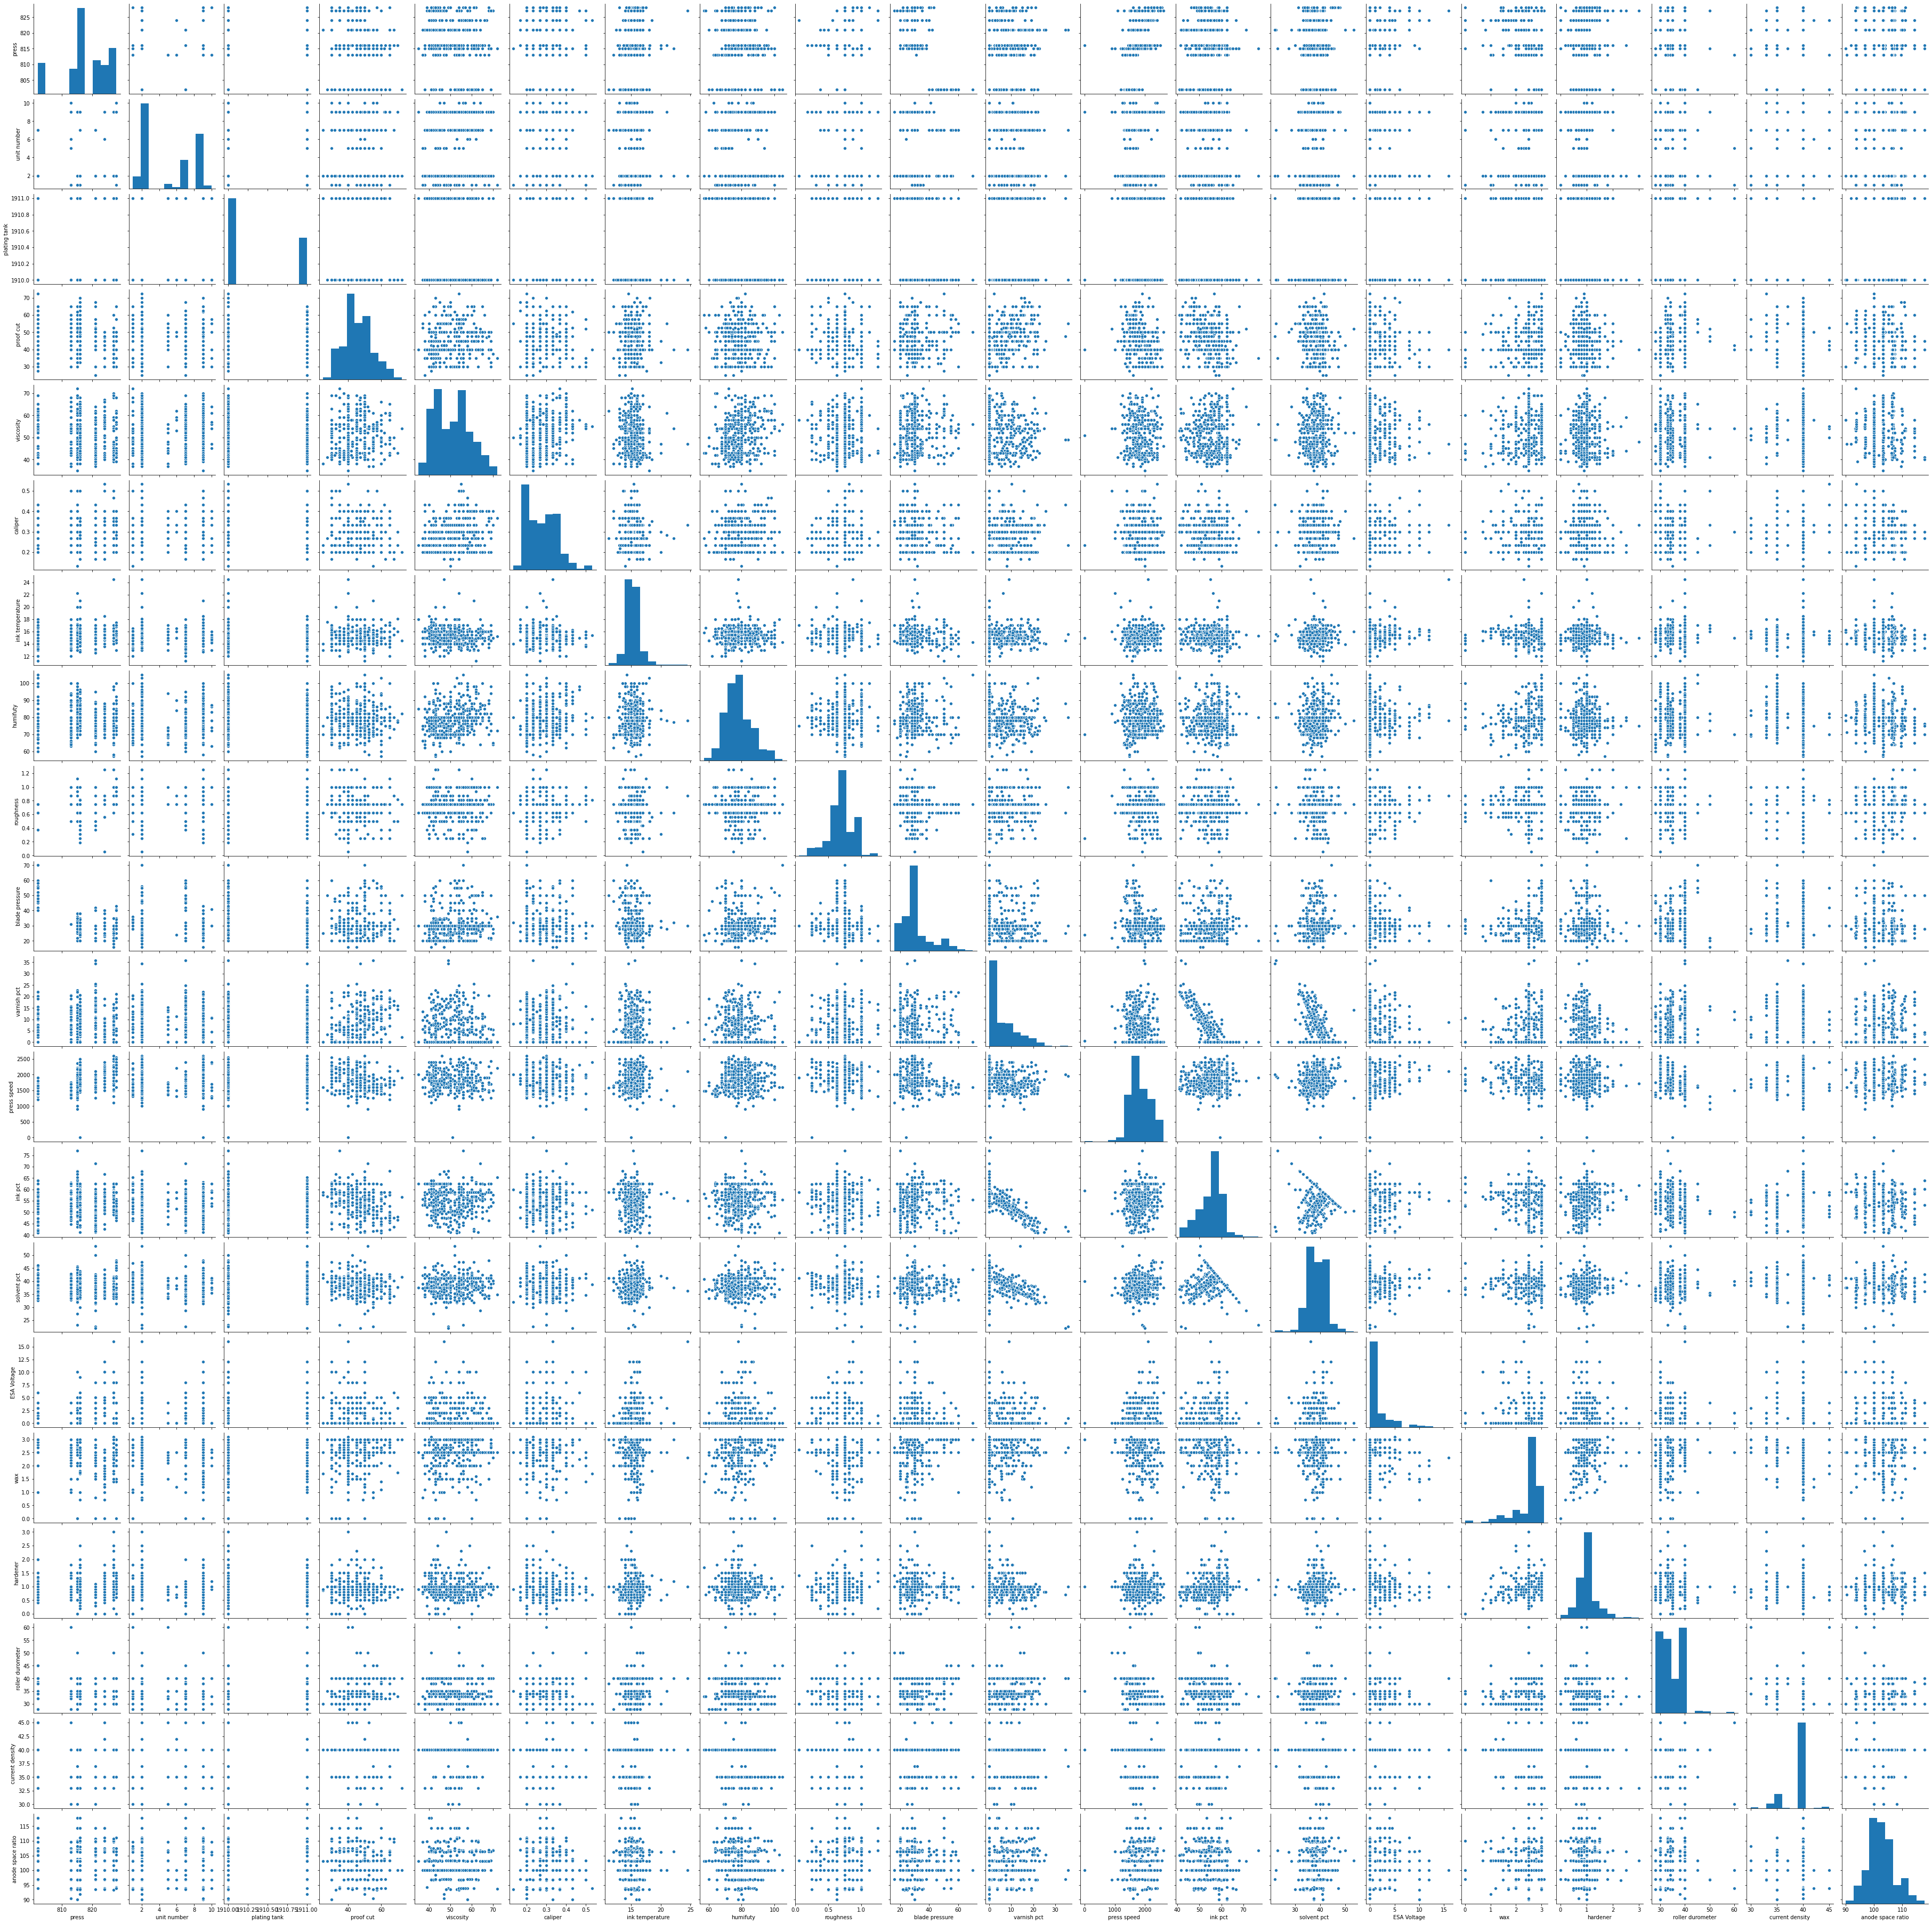

In [81]:
%matplotlib inline
sns.pairplot(data2)

Existe una posible relación lineal entre las variables **solven pct y varnish pct** y **solven pct y press speed**


<a id="section311"></a>
### <font color="#004D7F"> Matriz de Dispersión por Tipo según Band Type</font>

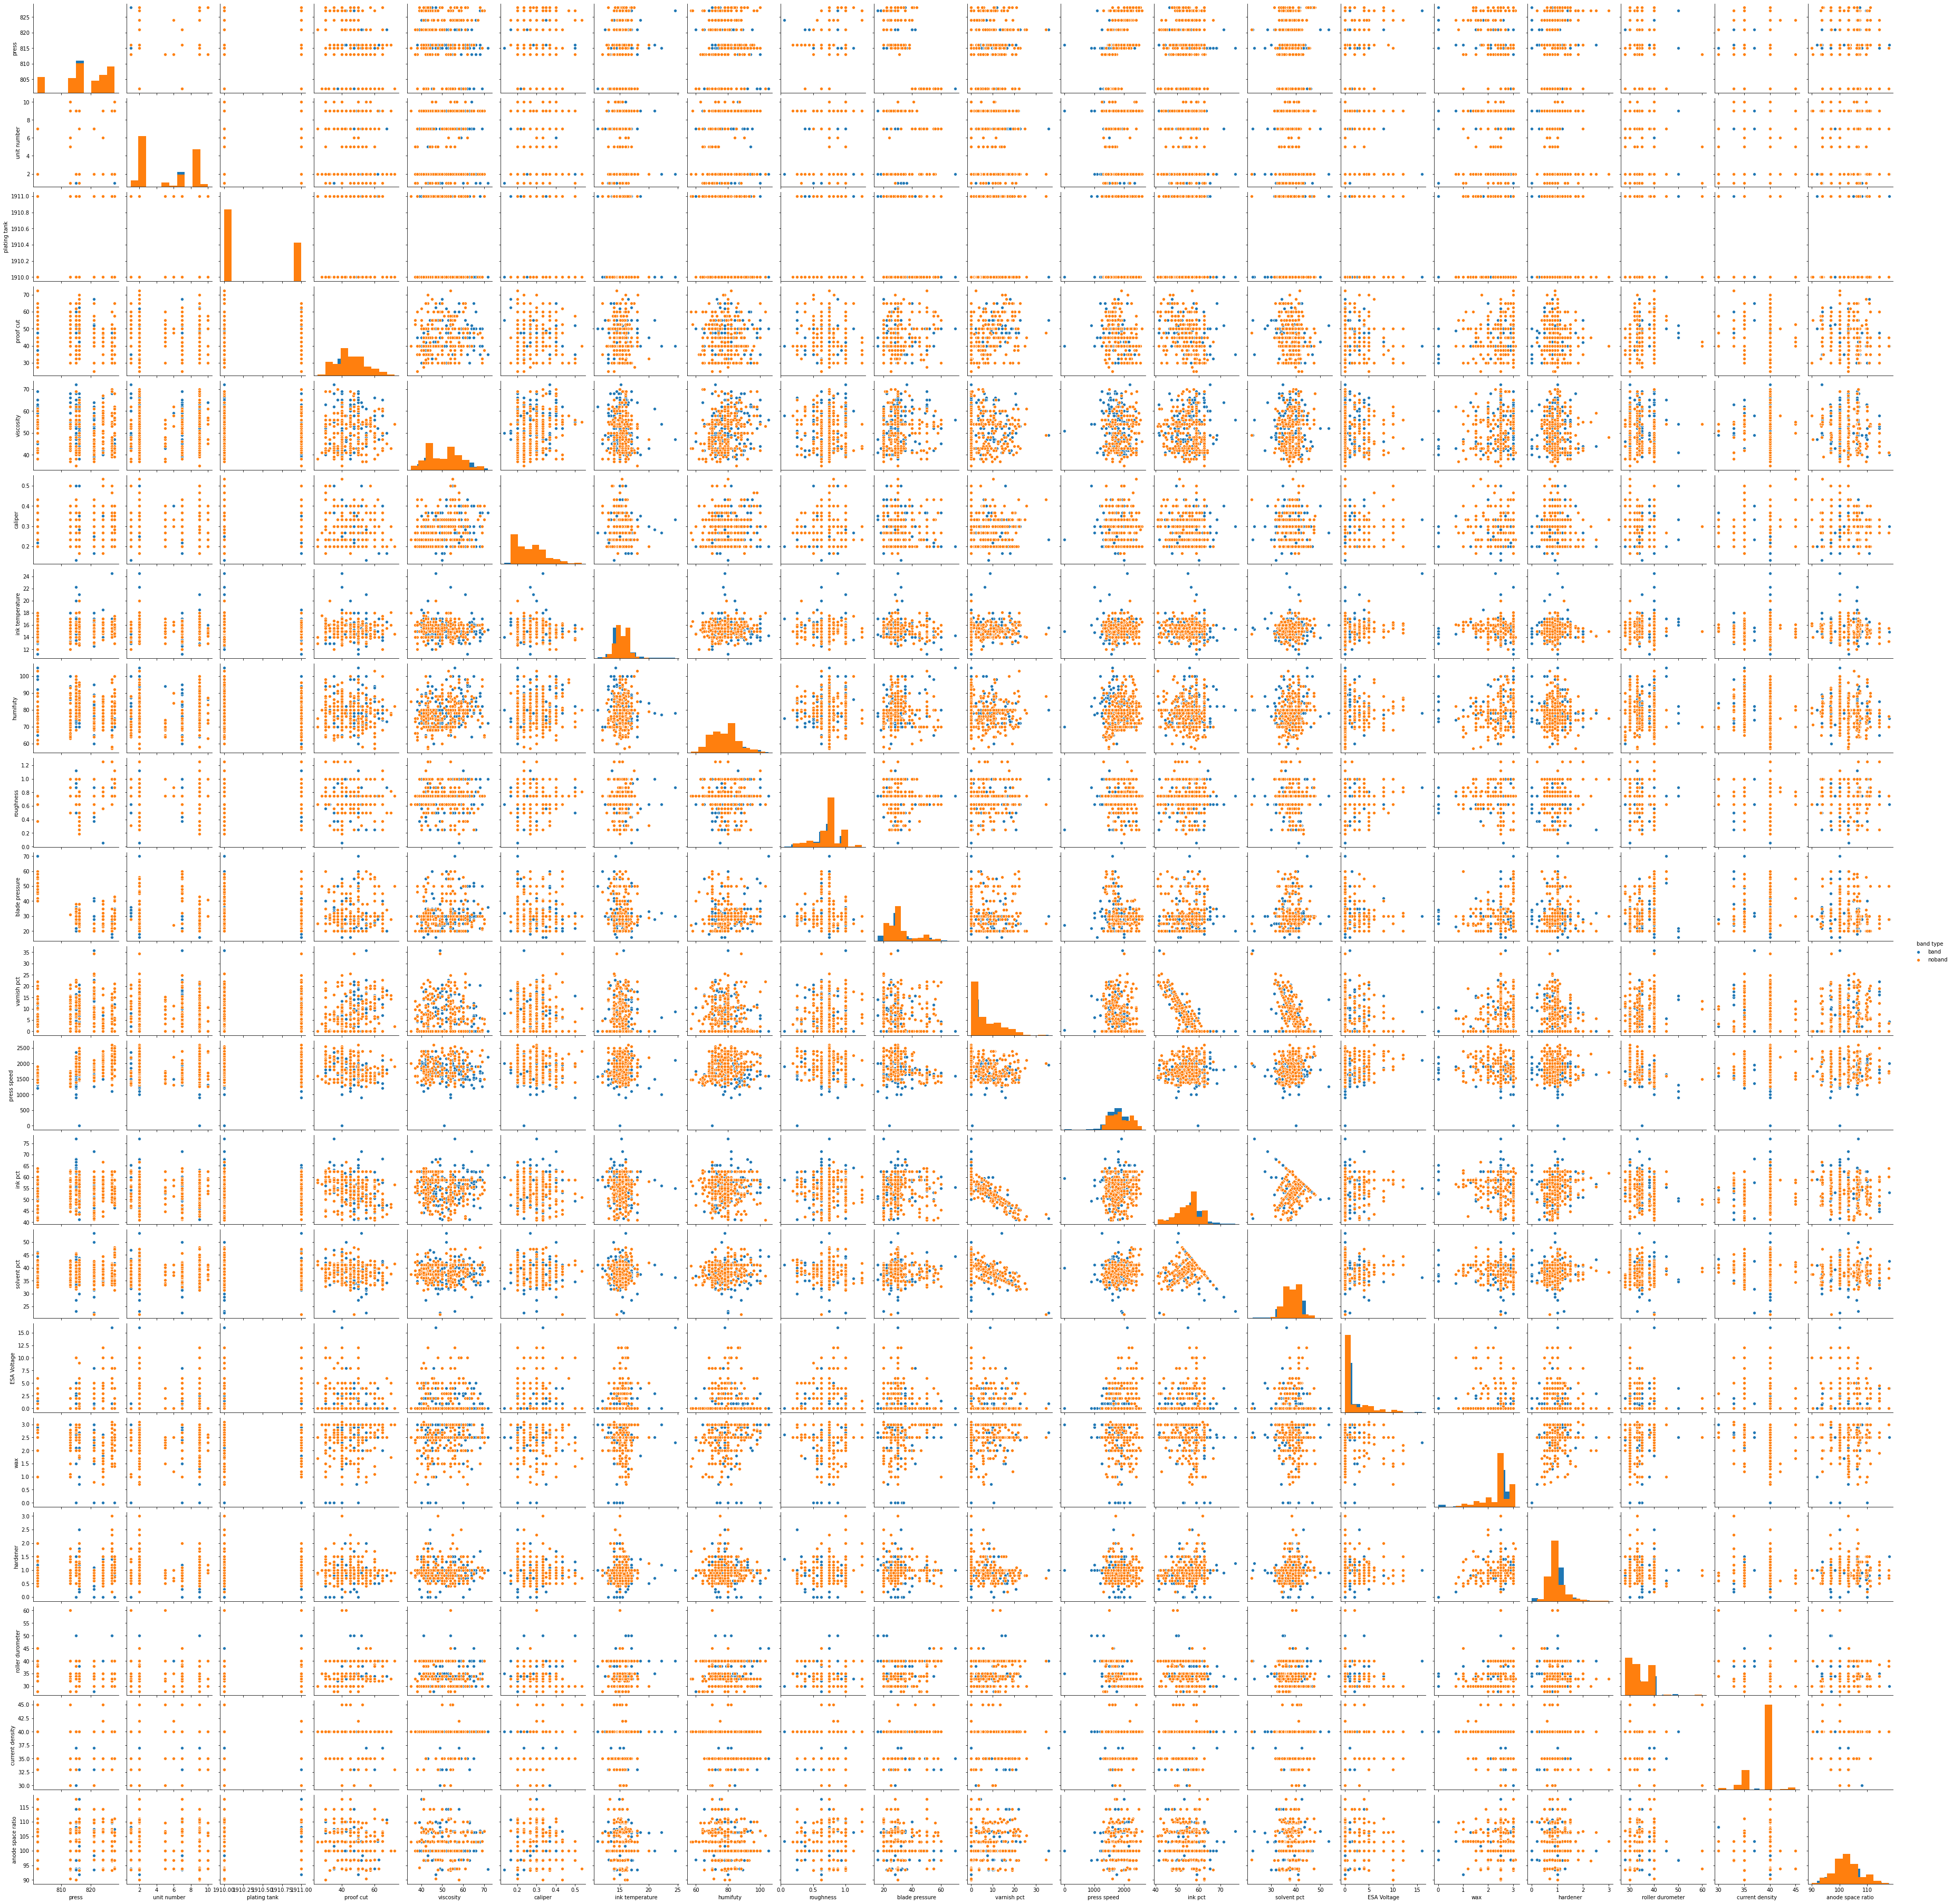

In [82]:
%matplotlib inline
g = sns.pairplot(data2, hue = 'band type',diag_kind='hist')

Al realizar el análisi de la matriz de correlación según **band type** no se encontraron variables que se relacionen de manera que se pueda distinguir notoriamente entre *type* y *no type*. Como se observa en la figura realizada (es necesario hacer zoom para analizar).

<a id="section33"></a>
## <font color="#004D7F"> 3.3. Imputación NA, Eliminación Outliers y OHE (o Label Encoding)</font>

# Eliminación de Outliers considerando 4 desviaciones estándar.

In [16]:
data2.info(verbose=False)
data2.dtypes
#data2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Columns: 29 entries, customer to band type
dtypes: float64(18), int64(2), object(9)
memory usage: 110.0+ KB


customer                object
grain screened          object
paper type              object
ink type                object
type of cylinder        object
press type              object
press                    int64
unit number              int64
cylinder size           object
paper mill location     object
plating tank           float64
proof cut              float64
viscosity              float64
caliper                float64
ink temperature        float64
humifuty               float64
roughness              float64
blade pressure         float64
varnish pct            float64
press speed            float64
ink pct                float64
solvent pct            float64
ESA Voltage            float64
wax                    float64
hardener               float64
roller durometer       float64
current density        float64
anode space ratio      float64
band type               object
dtype: object

In [17]:
data3 = data2.copy() #creamos una copia de la data2.

data3['plating tank'] = data3['plating tank'].astype('object')
data3['unit number'] = data3['unit number'].astype('object')
data3['press'] = data3['press'].astype('object')
data3.dtypes

customer                object
grain screened          object
paper type              object
ink type                object
type of cylinder        object
press type              object
press                   object
unit number             object
cylinder size           object
paper mill location     object
plating tank            object
proof cut              float64
viscosity              float64
caliper                float64
ink temperature        float64
humifuty               float64
roughness              float64
blade pressure         float64
varnish pct            float64
press speed            float64
ink pct                float64
solvent pct            float64
ESA Voltage            float64
wax                    float64
hardener               float64
roller durometer       float64
current density        float64
anode space ratio      float64
band type               object
dtype: object

In [18]:
data3

customer grain screened paper type  ink type type of cylinder press type press unit number  \
0     TVGUIDE            YES   UNCOATED  UNCOATED              YES   Motter94   821           2   
1     TVGUIDE            YES   UNCOATED  UNCOATED              YES   Motter94   821           2   
2      MODMAT            YES   UNCOATED    COATED              YES  WoodHoe70   815           9   
3      MASSEY            YES   UNCOATED  UNCOATED              YES  WoodHoe70   816           9   
4       KMART             NO   UNCOATED    COATED              YES  WoodHoe70   816           2   
..        ...            ...        ...       ...              ...        ...   ...         ...   
480  SHEPLERS            YES   UNCOATED  UNCOATED              YES   Albert70   802           7   
481     USCAV            YES   UNCOATED  UNCOATED               NO   Albert70   802           7   
482     KMART             NO   UNCOATED    COATED              YES   Motter94   821           7   
483     KMART             NO   UNCOATED    COATED              YES   Motter94   821           7   
484   TVGUIDE            YES   UNCOATED  UNCOATED              YES   Motter94   821           2   

    cylinder size paper mill location  ... press speed  ink pct  solvent pct  ESA Voltage  wax  \
0         TABLOID             NorthUS  ...      1700.0     50.5         36.4          0.0  2.5   
1         TABLOID             NorthUS  ...      1900.0     54.9         38.5          0.0  2.5   
2         CATALOG             NorthUS  ...      1850.0     53.8         39.8          0.0  2.8   
3         CATALOG             NorthUS  ...      1467.0     55.6         38.8          0.0  2.5   
4         TABLOID                 NaN  ...      2100.0     57.5         42.5          5.0  2.3   
..            ...                 ...  ...         ...      ...          ...          ...  ...   
480       SPIEGEL                 NaN  ...      1470.0     58.8         41.2          2.0  3.0   
481       CATALOG                 NaN  ...      1640.0     54.9         38.5          3.0  3.0   
482       TABLOID                 NaN  ...      2000.0     58.1         41.9          1.0  2.5   
483       TABLOID                 NaN  ...      2000.0     58.1         41.9          1.0  2.5   
484       TABLOID                 NaN  ...      1750.0     51.0         35.7          0.0  2.2   

     hardener  roller durometer  current density  anode space ratio  band type  
0         1.0              34.0             40.0             105.00       band  
1         0.7              34.0             40.0             105.00     noband  
2         0.9              40.0             40.0             103.87     noband  
3         1.3              40.0             40.0             108.06     noband  
4         0.6              35.0             40.0             106.67     noband  
..        ...               ...              ...                ...        ...  
480       1.0              34.0             40.0             100.00       band  
481       1.0              32.0             40.0             103.13       band  
482       0.6              35.0             40.0             100.00       band  
483       0.3              35.0             40.0             109.90       band  
484       0.7              34.0             40.0             100.00       band  

[485 rows x 29 columns]

In [19]:
num_features = data3.select_dtypes(include=['int64', 'float64']).columns
cat_features = data3.select_dtypes(include=['object', 'bool']).columns
float_features = data3.select_dtypes(include=['float64']).columns
float_features

Index(['proof cut', 'viscosity', 'caliper', 'ink temperature', 'humifuty', 'roughness',
       'blade pressure', 'varnish pct', 'press speed', 'ink pct', 'solvent pct', 'ESA Voltage',
       'wax', 'hardener', 'roller durometer', 'current density', 'anode space ratio'],
      dtype='object')

In [20]:
cat_features

Index(['customer', 'grain screened', 'paper type', 'ink type', 'type of cylinder', 'press type',
       'press', 'unit number', 'cylinder size', 'paper mill location', 'plating tank',
       'band type'],
      dtype='object')

In [21]:
df_data_outliers = data3[float_features]
df_data_outliers.head(1)

proof cut  viscosity  caliper  ink temperature  humifuty  roughness  blade pressure  \
0       55.0       46.0      0.2             17.0      78.0       0.75            20.0   

   varnish pct  press speed  ink pct  solvent pct  ESA Voltage  wax  hardener  roller durometer  \
0         13.1       1700.0     50.5         36.4          0.0  2.5       1.0              34.0   

   current density  anode space ratio  
0             40.0              105.0

In [22]:
for i in float_features:
    mean = data3.describe()[:][i][1] # primero identifico la media de una característica
    std = data3.describe()[:][i][2] # luego identifico la desviación estandard
    limit_upper = mean + 4*std # Calculo el valor de los ouliers superiores
    limit_down = mean - 4*std # Calculo el valor de los ouliers inferiores
    # Identificamos los índices de cada instancia que tenga valor outlier
    indexNames = data3[ (data3[i] > limit_upper) | (data3[i] < limit_down) ].index
    data3.drop(indexNames , inplace=True) # Eliminamos las observaciones según la identificación anterior

In [23]:
data3.shape

(460, 29)

In [24]:
data_sin_outliers = data3.reset_index()
del data_sin_outliers['index']
data_sin_outliers

customer grain screened paper type  ink type type of cylinder press type press unit number  \
0     TVGUIDE            YES   UNCOATED  UNCOATED              YES   Motter94   821           2   
1     TVGUIDE            YES   UNCOATED  UNCOATED              YES   Motter94   821           2   
2      MODMAT            YES   UNCOATED    COATED              YES  WoodHoe70   815           9   
3      MASSEY            YES   UNCOATED  UNCOATED              YES  WoodHoe70   816           9   
4       KMART             NO   UNCOATED    COATED              YES  WoodHoe70   816           2   
..        ...            ...        ...       ...              ...        ...   ...         ...   
455  SHEPLERS            YES   UNCOATED  UNCOATED              YES   Albert70   802           7   
456     USCAV            YES   UNCOATED  UNCOATED               NO   Albert70   802           7   
457     KMART             NO   UNCOATED    COATED              YES   Motter94   821           7   
458     KMART             NO   UNCOATED    COATED              YES   Motter94   821           7   
459   TVGUIDE            YES   UNCOATED  UNCOATED              YES   Motter94   821           2   

    cylinder size paper mill location  ... press speed  ink pct  solvent pct  ESA Voltage  wax  \
0         TABLOID             NorthUS  ...      1700.0     50.5         36.4          0.0  2.5   
1         TABLOID             NorthUS  ...      1900.0     54.9         38.5          0.0  2.5   
2         CATALOG             NorthUS  ...      1850.0     53.8         39.8          0.0  2.8   
3         CATALOG             NorthUS  ...      1467.0     55.6         38.8          0.0  2.5   
4         TABLOID                 NaN  ...      2100.0     57.5         42.5          5.0  2.3   
..            ...                 ...  ...         ...      ...          ...          ...  ...   
455       SPIEGEL                 NaN  ...      1470.0     58.8         41.2          2.0  3.0   
456       CATALOG                 NaN  ...      1640.0     54.9         38.5          3.0  3.0   
457       TABLOID                 NaN  ...      2000.0     58.1         41.9          1.0  2.5   
458       TABLOID                 NaN  ...      2000.0     58.1         41.9          1.0  2.5   
459       TABLOID                 NaN  ...      1750.0     51.0         35.7          0.0  2.2   

     hardener  roller durometer  current density  anode space ratio  band type  
0         1.0              34.0             40.0             105.00       band  
1         0.7              34.0             40.0             105.00     noband  
2         0.9              40.0             40.0             103.87     noband  
3         1.3              40.0             40.0             108.06     noband  
4         0.6              35.0             40.0             106.67     noband  
..        ...               ...              ...                ...        ...  
455       1.0              34.0             40.0             100.00       band  
456       1.0              32.0             40.0             103.13       band  
457       0.6              35.0             40.0             100.00       band  
458       0.3              35.0             40.0             109.90       band  
459       0.7              34.0             40.0             100.00       band  

[460 rows x 29 columns]

Como vemos respecto a la cantidad inicial se han eliminado de entre todas las variables 25 filas que tenían valores outliers mayor al límite asignado por el criterio determinado (*4 std()*)

In [25]:
data_nueva = data_sin_outliers.copy() #Copiamos la data para imputar los NA y realizar el OHE(o label encoding)

# Imputación y OHE (o lable encoding)

## Imputación

In [26]:
data = data_nueva.copy()


In [27]:
num_features = data.select_dtypes(include=['int64', 'float64']).columns
cat_features = data.select_dtypes(include=['object', 'bool']).columns
float_features = data.select_dtypes(include=['float64']).columns



In [28]:
print(data[num_features].columns)
print(data[cat_features].columns)

Index(['proof cut', 'viscosity', 'caliper', 'ink temperature', 'humifuty', 'roughness',
       'blade pressure', 'varnish pct', 'press speed', 'ink pct', 'solvent pct', 'ESA Voltage',
       'wax', 'hardener', 'roller durometer', 'current density', 'anode space ratio'],
      dtype='object')
Index(['customer', 'grain screened', 'paper type', 'ink type', 'type of cylinder', 'press type',
       'press', 'unit number', 'cylinder size', 'paper mill location', 'plating tank',
       'band type'],
      dtype='object')


In [29]:
from sklearn.impute import SimpleImputer

# Creamos un objeto de la clase Imputer con los parámetros por defecto
imp = SimpleImputer(strategy = 'median')
imp2 = SimpleImputer(strategy ='most_frequent')

# Llamamos a fit, para que aprenda la media y moda con la que tiene que rellenar los NaN's y le pasamos los datos
imp.fit(data[float_features])
imp2.fit(data[cat_features])

# Finalmente, transformamos los datos con las medias aprendidas.
data_trans1 = imp.transform(data[float_features])
data_trans2 = imp2.transform(data[cat_features])

### Convirtiendo array numpy a dataframe para concatenar en Pandas

In [30]:
data_trans1 #Observamos que es un array numpy

array([[ 55.   ,  46.   ,   0.2  , ...,  34.   ,  40.   , 105.   ],
       [ 55.   ,  46.   ,   0.3  , ...,  34.   ,  40.   , 105.   ],
       [ 62.   ,  40.   ,   0.433, ...,  40.   ,  40.   , 103.87 ],
       ...,
       [ 40.   ,  39.   ,   0.2  , ...,  35.   ,  40.   , 100.   ],
       [ 40.   ,  39.   ,   0.2  , ...,  35.   ,  40.   , 109.9  ],
       [ 40.   ,  59.   ,   0.25 , ...,  34.   ,  40.   , 100.   ]])

In [31]:
data_trans1 = pd.DataFrame(data_trans1)
data_trans2 = pd.DataFrame(data_trans2)

In [32]:
data_trans1.columns = ['proof cut', 'viscosity', 'caliper', 'ink temperature', 'humifuty', 'roughness',
       'blade pressure', 'varnish pct', 'press speed', 'ink pct', 'solvent pct', 'ESA Voltage',
       'wax', 'hardener', 'roller durometer', 'current density', 'anode space ratio'] #los nombres los obtuvimos con data[name_features].columns
data_trans2.columns = ['customer', 'grain screened', 'paper type', 'ink type', 'type of cylinder', 'press type',
       'press', 'unit number', 'cylinder size', 'paper mill location', 'plating tank',
       'band type'] #los nombres los obtuvimos con data[cat_features].columns
data_trans2

customer grain screened paper type  ink type type of cylinder press type press unit number  \
0     TVGUIDE            YES   UNCOATED  UNCOATED              YES   Motter94   821           2   
1     TVGUIDE            YES   UNCOATED  UNCOATED              YES   Motter94   821           2   
2      MODMAT            YES   UNCOATED    COATED              YES  WoodHoe70   815           9   
3      MASSEY            YES   UNCOATED  UNCOATED              YES  WoodHoe70   816           9   
4       KMART             NO   UNCOATED    COATED              YES  WoodHoe70   816           2   
..        ...            ...        ...       ...              ...        ...   ...         ...   
455  SHEPLERS            YES   UNCOATED  UNCOATED              YES   Albert70   802           7   
456     USCAV            YES   UNCOATED  UNCOATED               NO   Albert70   802           7   
457     KMART             NO   UNCOATED    COATED              YES   Motter94   821           7   
458     KMART             NO   UNCOATED    COATED              YES   Motter94   821           7   
459   TVGUIDE            YES   UNCOATED  UNCOATED              YES   Motter94   821           2   

    cylinder size paper mill location plating tank band type  
0         TABLOID             NorthUS     1.91e+03      band  
1         TABLOID             NorthUS     1.91e+03    noband  
2         CATALOG             NorthUS     1.91e+03    noband  
3         CATALOG             NorthUS     1.91e+03    noband  
4         TABLOID             NorthUS     1.91e+03    noband  
..            ...                 ...          ...       ...  
455       SPIEGEL             NorthUS     1.91e+03      band  
456       CATALOG             NorthUS     1.91e+03      band  
457       TABLOID             NorthUS     1.91e+03      band  
458       TABLOID             NorthUS     1.91e+03      band  
459       TABLOID             NorthUS     1.91e+03      band  

[460 rows x 12 columns]

### Concatenamos los dataframe obtenidos 

In [33]:
# La concatenación tiene que hacerse añadiendo las columnas de los dos dataframes 
data_trans = pd.concat([data_trans1,data_trans2], axis=1)

In [34]:
data_trans #data final obtenida después de imputar con sklearn

proof cut  viscosity  caliper  ink temperature  humifuty  roughness  blade pressure  \
0         55.0       46.0    0.200             17.0      78.0      0.750            20.0   
1         55.0       46.0    0.300             15.0      80.0      0.750            20.0   
2         62.0       40.0    0.433             16.0      80.0      0.750            30.0   
3         52.0       40.0    0.300             16.0      75.0      0.312            30.0   
4         50.0       46.0    0.300             17.0      80.0      0.750            30.0   
..         ...        ...      ...              ...       ...        ...             ...   
455       45.0       63.0    0.267             15.0      80.0      0.750            50.0   
456       37.5       65.0    0.200             16.0      80.0      0.625            50.0   
457       40.0       39.0    0.200             15.0      83.0      0.625            30.0   
458       40.0       39.0    0.200             15.0      72.0      0.375            30.0   
459       40.0       59.0    0.250             15.0      80.0      0.750            40.0   

     varnish pct  press speed  ink pct  ...  paper type  ink type  type of cylinder  press type  \
0           13.1       1700.0     50.5  ...    UNCOATED  UNCOATED               YES    Motter94   
1            6.6       1900.0     54.9  ...    UNCOATED  UNCOATED               YES    Motter94   
2            6.5       1850.0     53.8  ...    UNCOATED    COATED               YES   WoodHoe70   
3            5.6       1467.0     55.6  ...    UNCOATED  UNCOATED               YES   WoodHoe70   
4            0.0       2100.0     57.5  ...    UNCOATED    COATED               YES   WoodHoe70   
..           ...          ...      ...  ...         ...       ...               ...         ...   
455          0.0       1470.0     58.8  ...    UNCOATED  UNCOATED               YES    Albert70   
456          6.6       1640.0     54.9  ...    UNCOATED  UNCOATED                NO    Albert70   
457          0.0       2000.0     58.1  ...    UNCOATED    COATED               YES    Motter94   
458          0.0       2000.0     58.1  ...    UNCOATED    COATED               YES    Motter94   
459         13.3       1750.0     51.0  ...    UNCOATED  UNCOATED               YES    Motter94   

     press  unit number  cylinder size paper mill location plating tank band type  
0      821            2        TABLOID             NorthUS     1.91e+03      band  
1      821            2        TABLOID             NorthUS     1.91e+03    noband  
2      815            9        CATALOG             NorthUS     1.91e+03    noband  
3      816            9        CATALOG             NorthUS     1.91e+03    noband  
4      816            2        TABLOID             NorthUS     1.91e+03    noband  
..     ...          ...            ...                 ...          ...       ...  
455    802            7        SPIEGEL             NorthUS     1.91e+03      band  
456    802            7        CATALOG             NorthUS     1.91e+03      band  
457    821            7        TABLOID             NorthUS     1.91e+03      band  
458    821            7        TABLOID             NorthUS     1.91e+03      band  
459    821            2        TABLOID             NorthUS     1.91e+03      band  

[460 rows x 29 columns]

## OHE

In [35]:
def generateonlyDummies2(X):
    outd_X = pd.DataFrame()
    categories = {}
    for c in cat_features:
        categories[c] = X[c].dropna().unique().tolist()
        
    for c in cat_features:
            # Cambiamos las variables object a categorical para que las categorias tengan siempre el mismo orden
            c_df = X[c].astype(pd.api.types.CategoricalDtype(categories = categories[c]))
            #c_df.reset_index(drop=True, inplace=True)
            # One-hot encoding. Utilizamos get_dummies de pandas!
            c_dummies = pd.get_dummies(c_df, prefix=c)
            outd_X = pd.concat([outd_X, c_dummies], axis=1)
    outc_X = pd.DataFrame(X[num_features],columns=num_features)
    
    for c in num_features:
        outd_X[c] = outc_X[c].values
    return outd_X

In [36]:
df_ohe = generateonlyDummies2(data)
df_ohe.head()

customer_TVGUIDE  customer_MODMAT  customer_MASSEY  customer_KMART  customer_ROSES  \
0                 1                0                0               0               0   
1                 1                0                0               0               0   
2                 0                1                0               0               0   
3                 0                0                1               0               0   
4                 0                0                0               1               0   

   customer_CHILDCRAFT  customer_HANOVRHOUSE  customer_HANOVRHOUS  customer_GUIDEPOSTS  \
0                    0                     0                    0                    0   
1                    0                     0                    0                    0   
2                    0                     0                    0                    0   
3                    0                     0                    0                    0   
4                    0                     0                    0                    0   

   customer_HOMESHOP  ...  varnish pct  press speed  ink pct  solvent pct  ESA Voltage  wax  \
0                  0  ...         13.1       1700.0     50.5         36.4          0.0  2.5   
1                  0  ...          6.6       1900.0     54.9         38.5          0.0  2.5   
2                  0  ...          6.5       1850.0     53.8         39.8          0.0  2.8   
3                  0  ...          5.6       1467.0     55.6         38.8          0.0  2.5   
4                  0  ...          0.0       2100.0     57.5         42.5          5.0  2.3   

   hardener  roller durometer  current density  anode space ratio  
0       1.0              34.0             40.0             105.00  
1       0.7              34.0             40.0             105.00  
2       0.9              40.0             40.0             103.87  
3       1.3              40.0             40.0             108.06  
4       0.6              35.0             40.0             106.67  

[5 rows x 121 columns]

El algoritmo One Hot Encoding fue usado para el modelado pero no se obtuvieron buenos resultados.

# Label Enconding:


In [37]:
data_trans.dtypes
data2 = data_trans.copy()

In [38]:
data2
cat_features = data2.select_dtypes(include=['object', 'bool']).columns
data2[cat_features] = data2[cat_features].astype('category')
data2.dtypes

proof cut               float64
viscosity               float64
caliper                 float64
ink temperature         float64
humifuty                float64
roughness               float64
blade pressure          float64
varnish pct             float64
press speed             float64
ink pct                 float64
solvent pct             float64
ESA Voltage             float64
wax                     float64
hardener                float64
roller durometer        float64
current density         float64
anode space ratio       float64
customer               category
grain screened         category
paper type             category
ink type               category
type of cylinder       category
press type             category
press                  category
unit number            category
cylinder size          category
paper mill location    category
plating tank           category
band type              category
dtype: object

In [39]:
data2['customer'] = data2['customer'].cat.codes
data2['grain screened'] = data2['grain screened'].cat.codes
data2['paper type'] = data2['paper type'].cat.codes
data2['ink type'] = data2['ink type'].cat.codes
data2['type of cylinder'] = data2['type of cylinder'].cat.codes
data2['press type'] = data2['press type'].cat.codes
data2['press'] = data2['press'].cat.codes
data2['unit number'] = data2['unit number'].cat.codes
data2['cylinder size'] = data2['cylinder size'].cat.codes
data2['paper mill location'] = data2['paper mill location'].cat.codes
data2['plating tank'] = data2['plating tank'].cat.codes
data2['band type'] = data2['band type'].cat.codes
data2.head()

proof cut  viscosity  caliper  ink temperature  humifuty  roughness  blade pressure  \
0       55.0       46.0    0.200             17.0      78.0      0.750            20.0   
1       55.0       46.0    0.300             15.0      80.0      0.750            20.0   
2       62.0       40.0    0.433             16.0      80.0      0.750            30.0   
3       52.0       40.0    0.300             16.0      75.0      0.312            30.0   
4       50.0       46.0    0.300             17.0      80.0      0.750            30.0   

   varnish pct  press speed  ink pct  ...  paper type  ink type  type of cylinder  press type  \
0         13.1       1700.0     50.5  ...           1         2                 1           2   
1          6.6       1900.0     54.9  ...           1         2                 1           2   
2          6.5       1850.0     53.8  ...           1         0                 1           3   
3          5.6       1467.0     55.6  ...           1         2                 1           3   
4          0.0       2100.0     57.5  ...           1         0                 1           3   

   press  unit number  cylinder size  paper mill location  plating tank  band type  
0      4            1              2                    1             1          0  
1      4            1              2                    1             0          1  
2      2            5              0                    1             0          1  
3      3            5              0                    1             0          1  
4      3            1              2                    1             0          1  

[5 rows x 29 columns]

In [40]:
data2.dtypes

proof cut              float64
viscosity              float64
caliper                float64
ink temperature        float64
humifuty               float64
roughness              float64
blade pressure         float64
varnish pct            float64
press speed            float64
ink pct                float64
solvent pct            float64
ESA Voltage            float64
wax                    float64
hardener               float64
roller durometer       float64
current density        float64
anode space ratio      float64
customer                  int8
grain screened            int8
paper type                int8
ink type                  int8
type of cylinder          int8
press type                int8
press                     int8
unit number               int8
cylinder size             int8
paper mill location       int8
plating tank              int8
band type                 int8
dtype: object

In [41]:
data_model = data2.copy()

In [42]:
data_model.dtypes

proof cut              float64
viscosity              float64
caliper                float64
ink temperature        float64
humifuty               float64
roughness              float64
blade pressure         float64
varnish pct            float64
press speed            float64
ink pct                float64
solvent pct            float64
ESA Voltage            float64
wax                    float64
hardener               float64
roller durometer       float64
current density        float64
anode space ratio      float64
customer                  int8
grain screened            int8
paper type                int8
ink type                  int8
type of cylinder          int8
press type                int8
press                     int8
unit number               int8
cylinder size             int8
paper mill location       int8
plating tank              int8
band type                 int8
dtype: object

In [43]:
data_model = data2.copy()
data_model.dtypes

proof cut              float64
viscosity              float64
caliper                float64
ink temperature        float64
humifuty               float64
roughness              float64
blade pressure         float64
varnish pct            float64
press speed            float64
ink pct                float64
solvent pct            float64
ESA Voltage            float64
wax                    float64
hardener               float64
roller durometer       float64
current density        float64
anode space ratio      float64
customer                  int8
grain screened            int8
paper type                int8
ink type                  int8
type of cylinder          int8
press type                int8
press                     int8
unit number               int8
cylinder size             int8
paper mill location       int8
plating tank              int8
band type                 int8
dtype: object

<a id="section4"></a>
# <font color="#004D7F"> 4. Fase de modelado</font>

Se creará un modelo de datos y se estimará su Accuracy en datos no etiquetados.

De la manera siguiente:
* Crear conjunto de validación.
* Evaluación de línea base.
* Evaluar algoritmos: Estandarización.

<a id="section41"></a>
## <font color="#004D7F"> 4.1. Crear conjunto de validación</font>

Este conjunto de datos de validación es una parte de nuestra muestra no usada en la creación del modelo y sirve para confirmar el Accuracy del modelo final. Para nuestro caso usaremos la proporción convencional de 80:20 en entrenamiento/validación.

In [44]:
data_model #Cargamos el modelo de los datos

proof cut  viscosity  caliper  ink temperature  humifuty  roughness  blade pressure  \
0         55.0       46.0    0.200             17.0      78.0      0.750            20.0   
1         55.0       46.0    0.300             15.0      80.0      0.750            20.0   
2         62.0       40.0    0.433             16.0      80.0      0.750            30.0   
3         52.0       40.0    0.300             16.0      75.0      0.312            30.0   
4         50.0       46.0    0.300             17.0      80.0      0.750            30.0   
..         ...        ...      ...              ...       ...        ...             ...   
455       45.0       63.0    0.267             15.0      80.0      0.750            50.0   
456       37.5       65.0    0.200             16.0      80.0      0.625            50.0   
457       40.0       39.0    0.200             15.0      83.0      0.625            30.0   
458       40.0       39.0    0.200             15.0      72.0      0.375            30.0   
459       40.0       59.0    0.250             15.0      80.0      0.750            40.0   

     varnish pct  press speed  ink pct  ...  paper type  ink type  type of cylinder  press type  \
0           13.1       1700.0     50.5  ...           1         2                 1           2   
1            6.6       1900.0     54.9  ...           1         2                 1           2   
2            6.5       1850.0     53.8  ...           1         0                 1           3   
3            5.6       1467.0     55.6  ...           1         2                 1           3   
4            0.0       2100.0     57.5  ...           1         0                 1           3   
..           ...          ...      ...  ...         ...       ...               ...         ...   
455          0.0       1470.0     58.8  ...           1         2                 1           0   
456          6.6       1640.0     54.9  ...           1         2                 0           0   
457          0.0       2000.0     58.1  ...           1         0                 1           2   
458          0.0       2000.0     58.1  ...           1         0                 1           2   
459         13.3       1750.0     51.0  ...           1         2                 1           2   

     press  unit number  cylinder size  paper mill location  plating tank  band type  
0        4            1              2                    1             1          0  
1        4            1              2                    1             0          1  
2        2            5              0                    1             0          1  
3        3            5              0                    1             0          1  
4        3            1              2                    1             0          1  
..     ...          ...            ...                  ...           ...        ...  
455      0            4              1                    1             0          0  
456      0            4              0                    1             1          0  
457      4            4              2                    1             0          0  
458      4            4              2                    1             1          0  
459      4            1              2                    1             0          0  

[460 rows x 29 columns]

In [45]:
# Split-out validation dataset
array = data_model.values
X = array[:,0:28].astype(float)
Y = array[:,28]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

Ahora se tienen los datos de entrenamiento en `X_train` e `Y_train` para preparar modelos y conjuntos de `X_validation` e `Y_validation` que usaremos más adelante para validar el modelo.

<a id="section42"></a>
## <font color="#004D7F"> 4.2. Evaluación de línea base</font>

Habiendo probado muchos algoritmos tenemos en cuenta que los mejor funcionaron fueron **LoR**, **LDA**, **KNN**, **CART**, **NB** y **SVM** así que haremos una comparación base con ellos, tomaremos un cross-val de 10. Usaremos la métrica Accuracy para tener una idea inicial. 

Los algoritmos seleccionas son los siguientes:
* __Algoritmos lineales:__ LoR y LDA.
* __Algoritmos no lineales:__ CART, SVM, NB y $k$-NN.

In [46]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Los algoritmos usan parámetros por default, compararemos estos y mostraremos la media aritmética y desviación estándar de la métrica usada ("Accuracy") para cada algoritmo ensayado.

In [47]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

LR: 68.24% (4.53%)
LDA: 75.29% (5.80%)
KNN: 68.49% (5.12%)
CART: 66.85% (6.48%)
NB: 66.31% (5.09%)
SVM: 67.97% (6.62%)


Como podemos ver los valores obtenidos para los algoritmos son muy variables, sin embargo podemos ver que el **LDA** da un muy valor _75.29%_ con una desviación estándar de _5.80%_ en la métrica, sin embargo no debemos olvidar que no hemos trabajado con los hiperparámetros que podrían mejorar la salida final, ni mucho menos hemos hecho la validación. Además es recomendable mostrarlo gráficamente y ver la variación real de los _folds_ de validación cruzada mediante un boxplot.


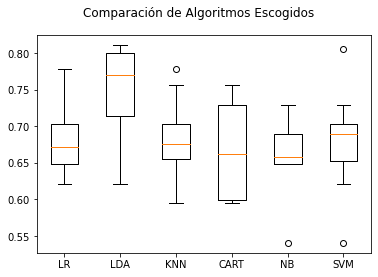

In [49]:
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos Escogidos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Como se puede ver los resultados presentan altas variaciones para los _fold_ analizado, es decir, presentan no muy buena regularidad aunque para el caso del LDA se obtuvo un muy buen promedio de Accuracy existe una amplia variación en cada _fold_, la mayoría presenta ese comportamiento no regular, pero podemos ver cual es el que más se ajusta y si en el caso sea modificando hiperparámetros conseguiremos un comportamiento regular o de mayor Accuracy.

Por lo cual los mejores serían LDA, K-NN y SVM, el primero por tener un alto Accuracy y los otros dos por presentar una distribución simétrica del Accuracy, ahora estandarizaremos los modelos elegidos en el conjunto de entrenamiento.

<a id="section43"></a>
## <font color="#004D7F"> 4.3. Evaluar modelos: estandarización, max min scaler, transformation</font>

Se tuvo la idea de que al realizar estandarización o transformación iba a existir un gran cambio en el modelo, sin embargo no resulto así, por ello esta parte se omitirá el desarrollo en el trabajo. 

<a id="section5"></a>
# <font color="#004D7F"> 5. Fase de Optimización</font>

En esta sección analizaremos los de "mejor valor" obtenido los cuales eran: $k$-NN y SVM los optimizaremos y compararemos con el LDA sin mejora.

<a id="section51"></a>
## <font color="#004D7F"> 5.1. Optimización de $k$-NN</font>

Para la optimización del $k$-NN podemos modificar el valor más importante el número de vecinos (valor impar). Por lo cual probaremos todos los valores impares desde el 1 al 31. Cada valor de _k_ se evalúa usando un cross val de 10. Veremos el que de mejor Accuracy de los valores testeados. 

*Acordar que no es conveniente realizar escalamiento ni transformaciones porque no dieron buenos resultados durante el desarrollo del proyecto.*

In [55]:
# Tune scaled KNN
neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{param}: {mean*100.0:,.2f}% ({stdev*100.0:,.2f}%)")

Best: 0.788514 using {'n_neighbors': 1}
{'n_neighbors': 1}: 78.85% (7.75%)
{'n_neighbors': 3}: 69.31% (6.80%)
{'n_neighbors': 5}: 68.49% (5.12%)
{'n_neighbors': 7}: 65.22% (5.72%)
{'n_neighbors': 9}: 67.70% (4.88%)
{'n_neighbors': 11}: 66.62% (5.76%)
{'n_neighbors': 13}: 65.53% (4.81%)
{'n_neighbors': 15}: 66.62% (6.24%)
{'n_neighbors': 17}: 67.98% (5.04%)
{'n_neighbors': 19}: 66.06% (5.65%)
{'n_neighbors': 21}: 66.32% (4.51%)
{'n_neighbors': 23}: 66.88% (5.29%)
{'n_neighbors': 25}: 68.24% (5.45%)
{'n_neighbors': 27}: 67.42% (6.17%)
{'n_neighbors': 29}: 67.69% (6.04%)
{'n_neighbors': 31}: 68.51% (5.20%)


Podemos ver que la configuración óptima es $k=1$ y nos da un 78.85% de Accuracy con una desviación estándar de 7.75%. Esto es interesante ya que el algoritmo hará predicciones utilizando la instancia más similar en el conjunto de datos de entrenamiento solo.

<a id="section52"></a>
## <font color="#004D7F"> 5.2. Optimización de SVM</font>

Como se sabe en el algoritmo SVM , los hiperparámetros más importantes son:

* *C* : Relajar el margen
* *tipo de kernel*

Usaremos el `GridSearchCV` para realizar la búsqueda con un cross val de 10. 

Valores de prueba de _kernel_ son : `linear`, `polinomial`, `rbf` y `sigmoide`.

Valores de prueba de _C_ son: valores decimales entre _0 y 2.0_.

In [61]:
# Tune scaled SVM
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{param}: {mean*100.0:,.2f}% ({stdev*100.0:,.2f}%)")

Best: 0.758333 using {'C': 0.3, 'kernel': 'linear'}
{'C': 0.1, 'kernel': 'linear'}: 75.56% (5.48%)
{'C': 0.1, 'kernel': 'poly'}: 67.97% (6.62%)
{'C': 0.1, 'kernel': 'rbf'}: 67.97% (6.62%)
{'C': 0.1, 'kernel': 'sigmoid'}: 67.97% (6.62%)
{'C': 0.3, 'kernel': 'linear'}: 75.83% (6.83%)
{'C': 0.3, 'kernel': 'poly'}: 67.97% (6.62%)
{'C': 0.3, 'kernel': 'rbf'}: 67.97% (6.62%)
{'C': 0.3, 'kernel': 'sigmoid'}: 67.97% (6.62%)
{'C': 0.5, 'kernel': 'linear'}: 74.47% (7.63%)
{'C': 0.5, 'kernel': 'poly'}: 67.97% (6.62%)
{'C': 0.5, 'kernel': 'rbf'}: 67.97% (6.62%)
{'C': 0.5, 'kernel': 'sigmoid'}: 58.97% (5.95%)
{'C': 0.7, 'kernel': 'linear'}: 75.02% (7.68%)
{'C': 0.7, 'kernel': 'poly'}: 67.97% (6.62%)
{'C': 0.7, 'kernel': 'rbf'}: 67.97% (6.62%)
{'C': 0.7, 'kernel': 'sigmoid'}: 51.91% (6.41%)
{'C': 0.9, 'kernel': 'linear'}: 73.65% (7.63%)
{'C': 0.9, 'kernel': 'poly'}: 67.97% (6.62%)
{'C': 0.9, 'kernel': 'rbf'}: 67.97% (6.62%)
{'C': 0.9, 'kernel': 'sigmoid'}: 50.29% (5.62%)
{'C': 1.0, 'kernel': 'linear

Podemos ver que la configuración más precisa fue SVM con un _kernel linear_ y un valor _C_ de 20.3. La precisión del 75.83% es aparentemente mejor de lo que $k$-NN podría lograr.

<a id="section6"></a>
# <font color="#004D7F"> 6. Algoritmos ensamblados</font>

Para mejorar el rendimiento se optó por estos algoritmos veremos los siguientes tipos:

* Métodos Boosting: AdaBoost (AB) y Gradient Boosting (GBM).
* Métodos Bagging: Random Forest (RF) y Extra Trees (ET).

Usaremos una validación cruzada de 10. Y no usaremos escalamiento ni transformaciones.


In [59]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {mean*100.0:,.2f}% ({stdev*100.0:,.2f}%)")

AB: 68.48% (6.50%)
GBM: 68.48% (6.50%)
RF: 68.48% (6.50%)
ET: 68.48% (6.50%)


Podemos ver que ambas técnicas proporcionan puntajes de Accuracy bajos (por debajo de 70%) con configuraciones predeterminadas. Veremos la distribución de puntajes de Accruacy en los _folds_ de validación cruzada en boxplot.

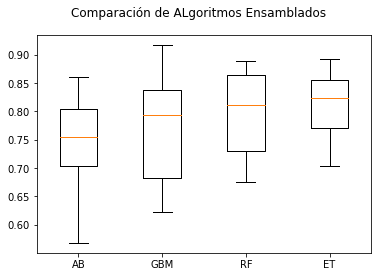

In [60]:
fig = plt.figure()
fig.suptitle('Comparación de ALgoritmos Ensamblados')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Los resultados sugieren que ET ppuede ser uno de los mejores a estudiar, sin embargo posee una media aritmética de 68.48% y una extensión relativamente amplia del Accuracy.

<a id="section7"></a>
# <font color="#004D7F"> 7. Fase de Forecasting</font>

El modelo $k$-NN es el que presentó mejores resultados, sin embargo el LDA también desde los inicios dio muy buenos resultados (comparados con todos los otros algoritmos). Ahora usaremos el conjunto de datos de validación para revisar si en verdad los resultados esperados funcionan como los entrenandos respecto a la métrica.



In [68]:
# Finalize Model
# prepare the model
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, Y_train)
# estimate accuracy on validation dataset
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6304347826086957
[[14 26]
 [ 8 44]]
              precision    recall  f1-score   support

         0.0       0.64      0.35      0.45        40
         1.0       0.63      0.85      0.72        52

    accuracy                           0.63        92
   macro avg       0.63      0.60      0.59        92
weighted avg       0.63      0.63      0.60        92



In [69]:
# Finalize Model
# prepare the model
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
# estimate accuracy on validation dataset
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6413043478260869
[[16 24]
 [ 9 43]]
              precision    recall  f1-score   support

         0.0       0.64      0.40      0.49        40
         1.0       0.64      0.83      0.72        52

    accuracy                           0.64        92
   macro avg       0.64      0.61      0.61        92
weighted avg       0.64      0.64      0.62        92



Podemos ver que alcanzamos una precisión de casi el 64% en el conjunto de datos de validación extendido. Una puntuación no coincide estrechamente con nuestras expectativas estimadas, sin embargo es el mejor ajuste encontrado. tanto para el modelo **LDA** simple como para el **K-NN** optimizado.

# Conclusiones

* Los mejores algoritmos son LDA y K-NN con similares valores obtenidos al final del modelamiento.
* La base de datos obtenidas no es clara en su obtención ni explicación de las variables definidas en el dataset por lo cual el modelado realizado tienei que ser tomado con mucho cuidado.
* Aunque se probo con muchos modelos, se realizó el Análisis Exploratorio de Datos, procesos de Escalamiento, Transformación, Imputación, además de optimización de hiperparámetros los valores de salidad para el conjunto de validación siguen siendo en promedio 65%, es posible que el no balanceo de clases afecte altamente esto.

# Recomendaciones

* Se reviso que el LDA tiene hiperparámetros como el _solve_ , _shrinkage_ que posiblemente generen mejoras si se optimizan.
* Se recomienda que si la base de datos no es fiable el modelamiento tendrá serios problemas y es mejor no aplicarlo.
* Buscar otras base de datos y seguir practicando.

## *Good Coding!!!*